In [530]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from pandas.api.types import is_numeric_dtype

# Load and merge datasets

In [3]:
# datafiles
glob.glob('./data/*')

['./data/test_transaction.csv',
 './data/train_identity.csv',
 './data/test_identity.csv',
 './data/sample_submission.csv',
 './data/train_transaction.csv']

In [4]:
df_id = pd.read_csv('./data/train_identity.csv')
print("shape of id data", df_id.shape)
df_transaction = pd.read_csv('./data/train_transaction.csv')
print("shape of transaction data", df_transaction.shape)
train_data = pd.merge(df_id, df_transaction, on='TransactionID', how='right')

shape of id data (144233, 41)
shape of transaction data (590540, 394)


In [39]:
df_id.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [5]:
df_id_test = pd.read_csv('./data/test_identity.csv')
print("shape of id data", df_id_test.shape)
df_transaction_test = pd.read_csv('./data/test_transaction.csv')
print("shape of transaction data", df_transaction_test.shape)
test_data = pd.merge(df_id_test, df_transaction_test, on='TransactionID', how='right')

shape of id data (141907, 41)
shape of transaction data (506691, 393)


Id cols are labeled different across train and test data. Let's correct that.

In [6]:
newcols = []
for col in df_id_test.columns.values:
    newcols.append(col.replace("-", "_"))
    
df_id_test.columns = newcols

In [7]:
test_data = pd.merge(df_id_test, df_transaction_test, on='TransactionID', how='right')

The test data is missing the is Fraud column (of course). Both datasets are at the transaction level yet, transaction data is 5x id data? We used an outer join so we will have a lot of nans. Let's look at the totals for each columns first.

# Exploring Missing Data

In [244]:
# Check if response var missing for training data
train_data[train_data["isFraud"].isnull()]

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339


In [8]:
# check for any infinite values
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
# Remove response from training data
y = train_data["isFraud"]
X = train_data.drop(columns=["isFraud"])

In [14]:
# Find % missing for each feature in train and test dataset
missing = pd.DataFrame()

missing["Feature"] = X.columns
missing["Train Missing"] = ((X.isnull().sum())/X.shape[0]).values
missing["Test Missing"] = ((test_data.isnull().sum())/test_data.shape[0]).values

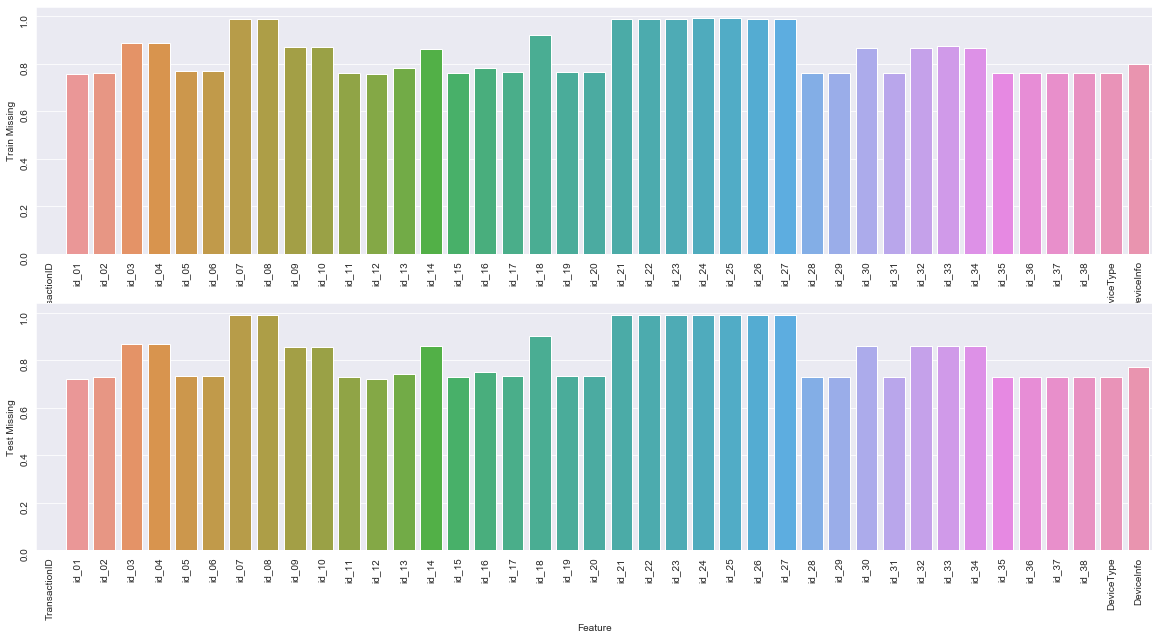

In [204]:
# Plot bar chart of % missing (id features)
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.barplot(x="Feature", y="Train Missing", data=missing.iloc[0:41, :], ax=ax[0])
sns.barplot(x="Feature", y="Test Missing", data=missing.iloc[0:41, :], ax=ax[1])
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
plt.show()

Similar distributions of missing data for train and test for id features. 2/3 of both 

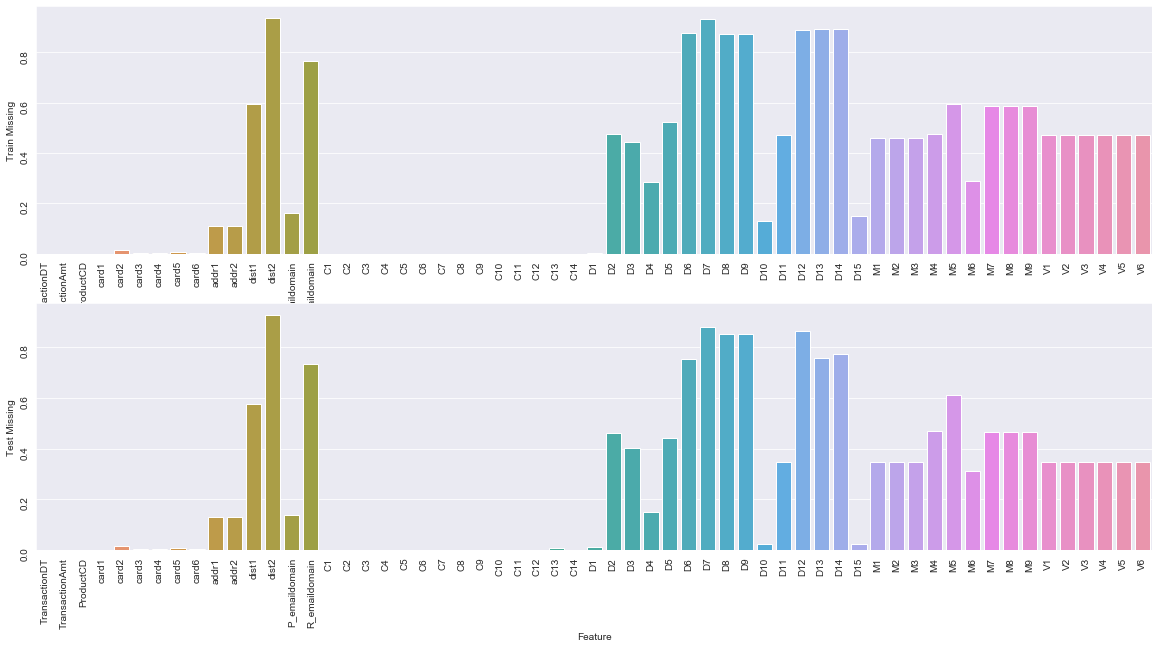

In [210]:
# Plot bar chart of % missing (id features)
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.barplot(x="Feature", y="Train Missing", data=missing.iloc[41:100:, :], ax=ax[0])
sns.barplot(x="Feature", y="Test Missing", data=missing.iloc[41:100, :], ax=ax[1])
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
plt.show()

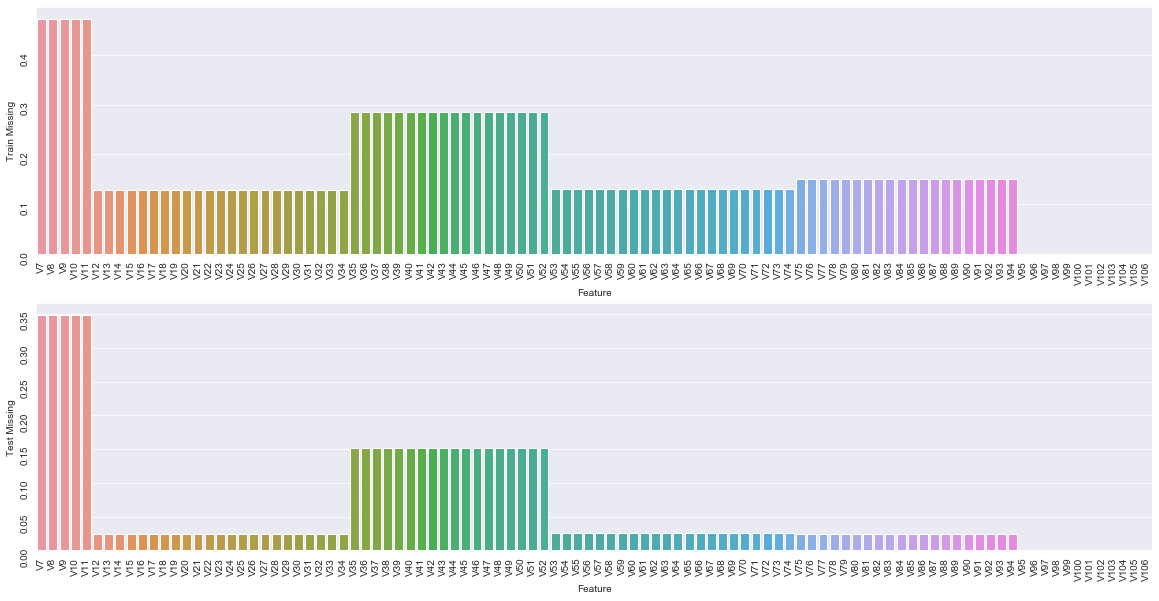

In [211]:
# Plot bar chart of % missing (id features)
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.barplot(x="Feature", y="Train Missing", data=missing.iloc[100:200:, :], ax=ax[0])
sns.barplot(x="Feature", y="Test Missing", data=missing.iloc[100:200, :], ax=ax[1])
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
plt.show()

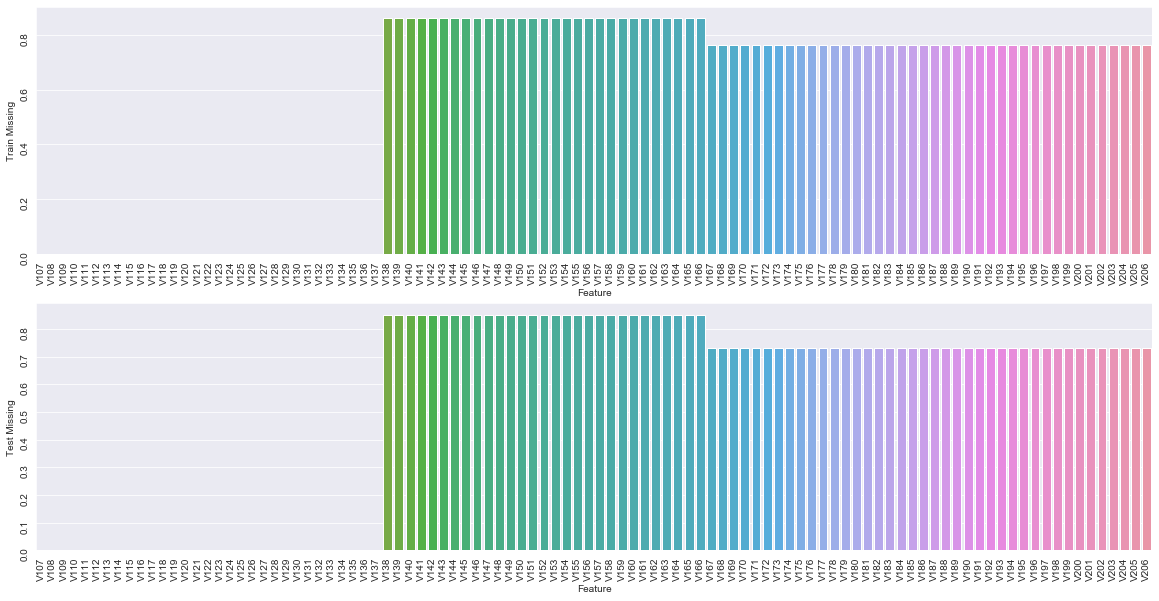

In [212]:
# Plot bar chart of % missing (id features)
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.barplot(x="Feature", y="Train Missing", data=missing.iloc[200:300:, :], ax=ax[0])
sns.barplot(x="Feature", y="Test Missing", data=missing.iloc[200:300, :], ax=ax[1])
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
plt.show()

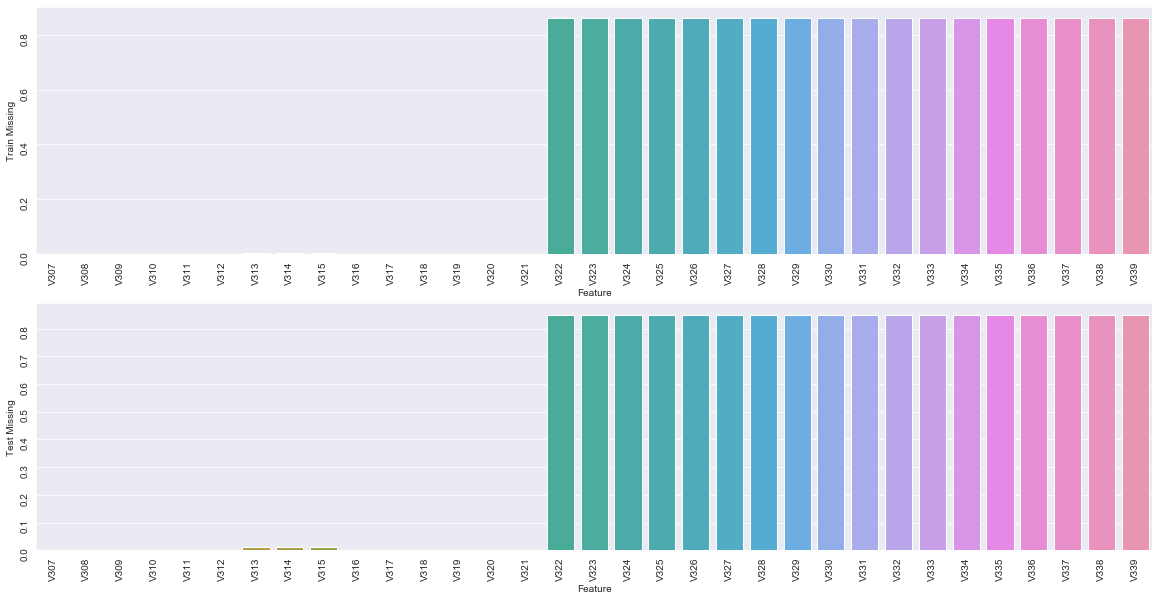

In [213]:
# Plot bar chart of % missing (id features)
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.barplot(x="Feature", y="Train Missing", data=missing.iloc[400::, :], ax=ax[0])
sns.barplot(x="Feature", y="Test Missing", data=missing.iloc[400:, :], ax=ax[1])
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)
plt.show()

In [15]:
# Drop col with large # of missing data in train and test
# possible hyperparam
many_nulls_train = list(missing[(missing["Train Missing"]>.9) | (missing["Test Missing"]>.9)]["Feature"])

In [16]:
# Drop colmns with one value only (we can experiment with this...?)
#https://www.kaggle.com/artgor/eda-and-models/notebook
big_top_value_cols_train = [col for col in X.columns if train_data[col].value_counts(dropna=False,
                                                                              normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test_data.columns if test_data[col].value_counts(dropna=False,
                                                                              normalize=True).values[0] > 0.9]

In [17]:
drop_cols = set(many_nulls_train + big_top_value_cols_train + big_top_value_cols_test)

In [18]:
print("We are dropping " + str(len(drop_cols)) + " columns")

We are dropping 82 columns


In [19]:
drop_cols

{'C3',
 'D7',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V129',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V14',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V281',
 'V284',
 'V286',
 'V290',
 'V293',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V305',
 'V309',
 'V311',
 'V316',
 'V318',
 'V319',
 'V320',
 'V321',
 'V55',
 'V65',
 'V66',
 'V67',
 'V68',
 'V77',
 'V86',
 'V88',
 'V89',
 'V98',
 'dist2',
 'id_07',
 'id_08',
 'id_18',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27'}

In [20]:
# Drop columns
X = X.drop(columns=drop_cols)
test_data = test_data.drop(columns=drop_cols)

# Exploring features for imputation/engineering

### Id columns

In [21]:
X.columns[0:31]

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

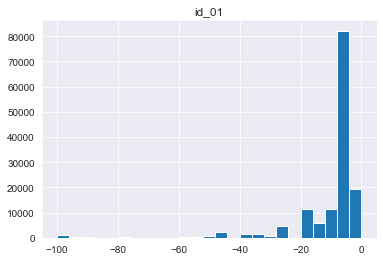

In [224]:
plt.hist(X['id_01'], bins=25)
plt.title("id_01")
plt.show()

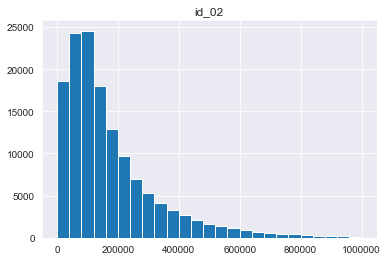

In [225]:
plt.hist(X['id_02'], bins=25)
plt.title("id_02")
plt.show()

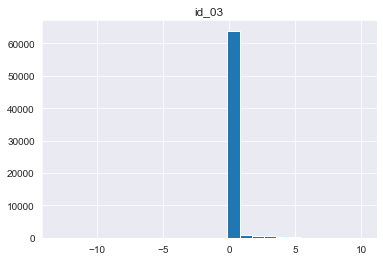

In [269]:
plt.hist(X['id_03'], bins=25)
plt.title("id_03")
plt.show()

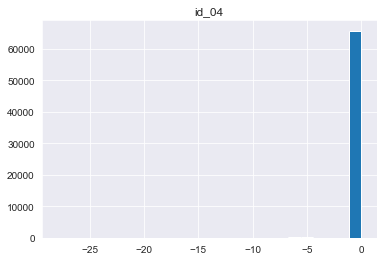

In [270]:
plt.hist(X['id_04'], bins=25)
plt.title("id_04")
plt.show()

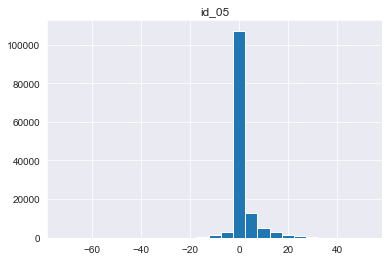

In [226]:
plt.hist(X['id_05'], bins=25)
plt.title("id_05")
plt.show()

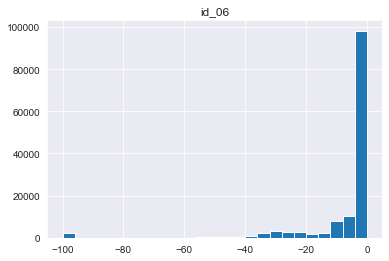

In [227]:
plt.hist(X['id_06'], bins=25)
plt.title("id_06")
plt.show()

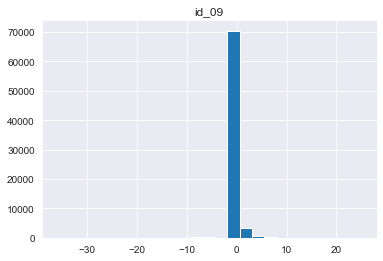

In [272]:
plt.hist(X['id_09'], bins=25)
plt.title("id_09")
plt.show()

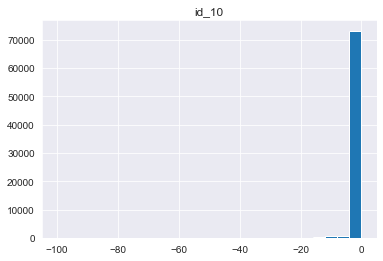

In [273]:
plt.hist(X['id_10'], bins=25)
plt.title("id_10")
plt.show()

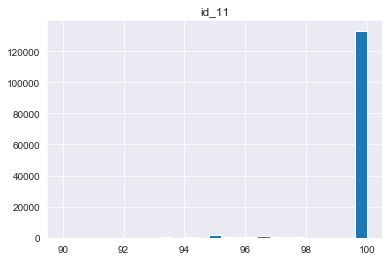

In [228]:
plt.hist(X['id_11'], bins=25)
plt.title("id_11")
plt.show()

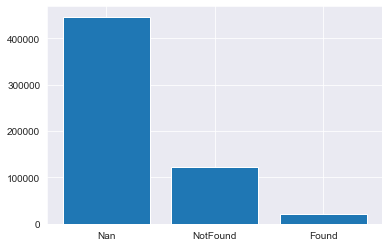

In [230]:
plt.bar(x=['Nan', 'NotFound', 'Found'], height=X['id_12'].value_counts(dropna=False).values)
plt.show()

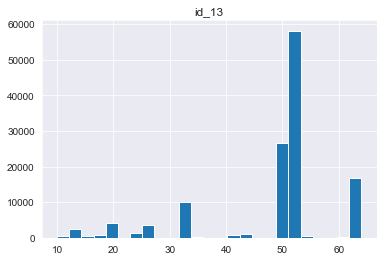

In [231]:
plt.hist(X['id_13'], bins=25)
plt.title("id_13")
plt.show()

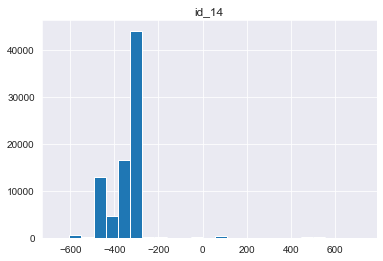

In [274]:
plt.hist(X['id_14'], bins=25)
plt.title("id_14")
plt.show()

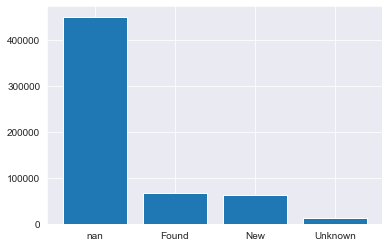

In [375]:
plt.bar(x=['nan'] + list(X['id_15'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_15'].value_counts(dropna=False).values)
plt.show()

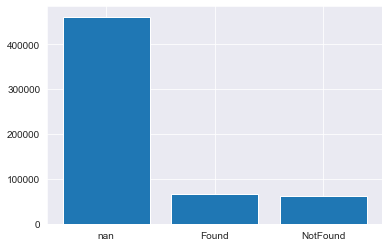

In [233]:
plt.bar(x=['nan'] + list(X['id_16'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_16'].value_counts(dropna=False).values)
plt.show()

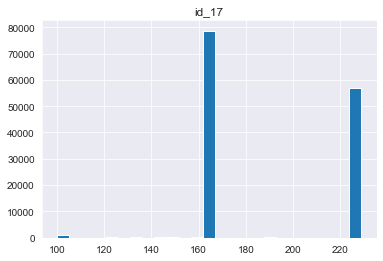

In [234]:
plt.hist(X['id_17'], bins=25)
plt.title("id_17")
plt.show()

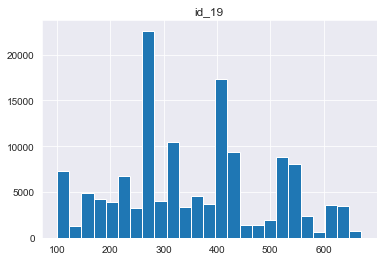

In [235]:
plt.hist(X['id_19'], bins=25)
plt.title("id_19")
plt.show()

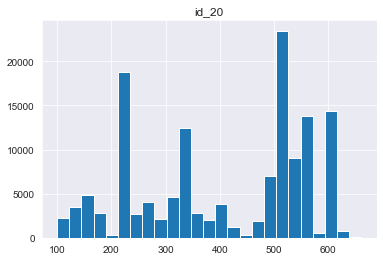

In [252]:
plt.hist(X['id_20'], bins=25)
plt.title("id_20")
plt.show()

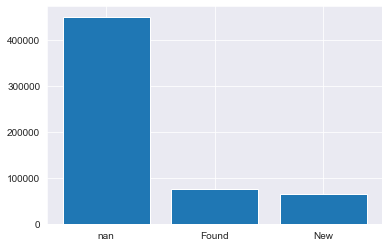

In [254]:
plt.bar(x=['nan'] + list(X['id_28'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_28'].value_counts(dropna=False).values)
plt.show()

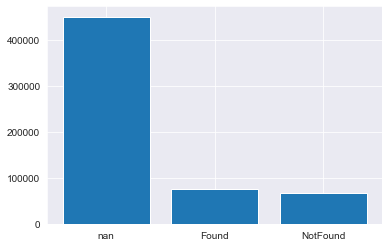

In [258]:
plt.bar(x=['nan'] + list(X['id_29'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_29'].value_counts(dropna=False).values)
plt.show()

In [404]:
# Transform browser category
browsers = ["chrome", "edge", "firefox", "ie", "safari" , "opera", "google", "samsung"]
X['id_31'] = X['id_31'].str.lower()
test_data['id_31'] = test_data['id_31'].str.lower()
for b in browsers:
    X.loc[X["id_31"].str.contains(b).fillna(False), "id_31"] = b
    test_data.loc[test_data['id_31'].str.contains(b).fillna(False), 'id_31'] = b

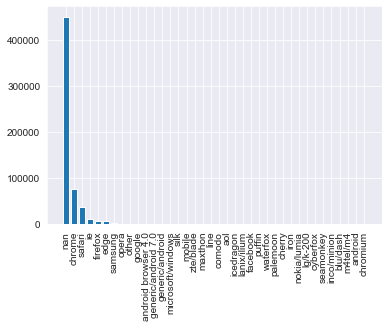

In [407]:
plt.bar(x=['nan'] + list(X['id_31'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_31'].value_counts(dropna=False).values)
plt.xticks(rotation=90)
plt.show()

Id 31 needs to be transformed to have fewer categories if we want to dummy encode it. Should we try to manually collapse it before dummy encoding?

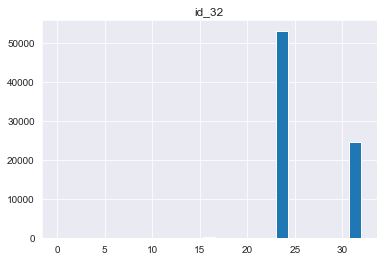

In [302]:
plt.hist(X['id_32'], bins=25)
plt.title("id_32")
plt.show()

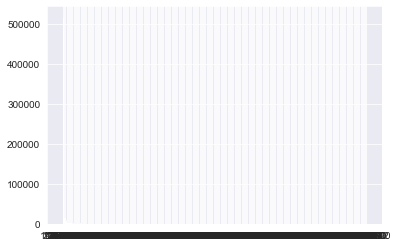

In [304]:
plt.bar(x=['nan'] + list(X['id_33'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_33'].value_counts(dropna=False).values)
plt.show()

Id 33 also has many categories but I'm not sure how to collapse them.

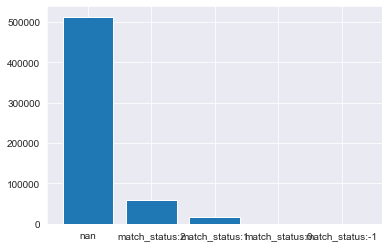

In [306]:
plt.bar(x=['nan'] + list(X['id_34'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_34'].value_counts(dropna=False).values)
plt.show()

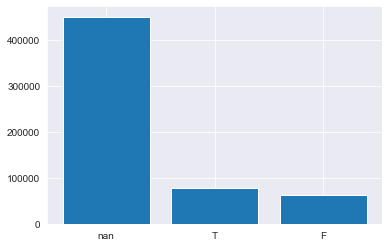

In [307]:
plt.bar(x=['nan'] + list(X['id_35'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_35'].value_counts(dropna=False).values)
plt.show()

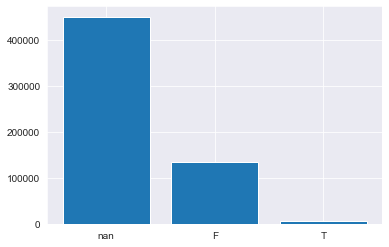

In [308]:
plt.bar(x=['nan'] + list(X['id_36'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_36'].value_counts(dropna=False).values)
plt.show()

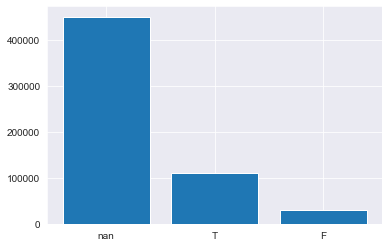

In [309]:
plt.bar(x=['nan'] + list(X['id_37'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_37'].value_counts(dropna=False).values)
plt.show()

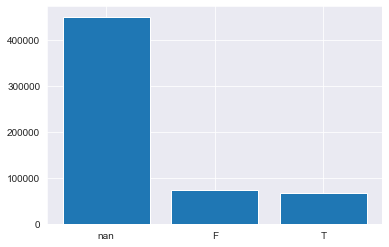

In [310]:
plt.bar(x=['nan'] + list(X['id_38'].value_counts(dropna=False).index.values)[1:], 
           height=X['id_38'].value_counts(dropna=False).values)
plt.show()

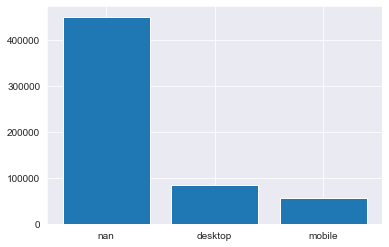

In [311]:
plt.bar(x=['nan'] + list(X['DeviceType'].value_counts(dropna=False).index.values)[1:], 
           height=X['DeviceType'].value_counts(dropna=False).values)
plt.show()

In [425]:
list(X['DeviceInfo'].value_counts(dropna=False).index)

[nan,
 'Windows',
 'iOS Device',
 'MacOS',
 'Trident/7.0',
 'rv:11.0',
 'rv:57.0',
 'SM-J700M Build/MMB29K',
 'SM-G610M Build/MMB29K',
 'SM-G531H Build/LMY48B',
 'rv:59.0',
 'SM-G935F Build/NRD90M',
 'SM-G955U Build/NRD90M',
 'SM-G532M Build/MMB29T',
 'ALE-L23 Build/HuaweiALE-L23',
 'SM-G950U Build/NRD90M',
 'SM-G930V Build/NRD90M',
 'rv:58.0',
 'rv:52.0',
 'SAMSUNG',
 'SM-G950F Build/NRD90M',
 'Moto G (4) Build/NPJ25.93-14.7',
 'SM-N950U Build/NMF26X',
 'SM-A300H Build/LRX22G',
 'hi6210sft Build/MRA58K',
 'SM-J730GM Build/NRD90M',
 'SM-G570M Build/MMB29K',
 'rv:48.0',
 'CAM-L03 Build/HUAWEICAM-L03',
 'SM-J320M Build/LMY47V',
 'LG-M700 Build/NMF26X',
 'Moto E (4) Plus Build/NMA26.42-69',
 'SM-J510MN Build/MMB29M',
 'SM-J701M Build/NRD90M',
 'LG-D693n Build/LRX22G',
 'Moto G (4) Build/NPJS25.93-14-13',
 'SM-A520F Build/NRD90M',
 'SM-G930F Build/NRD90M',
 'SM-G935V Build/NRD90M',
 'LG-K410 Build/LRX22G',
 'PRA-LX3 Build/HUAWEIPRA-LX3',
 'SM-G955F Build/NRD90M',
 'Moto G (5) Plus Build/NP

In [408]:
# Tranform devices
devices = ["sm-", "lg-", "moto", "rv", "ale-", "SAMSUNG", "pra", 
 "TRT", "huawei", "WAS", "Linux", "HTC", "MYA", "Blade", "RNE", "CRO", "BLL", "CHC", 
"Hisense", "GT-", "BAC", "SLA", "Lenovo", "Redmi", "Nexus", "Windows", "Ilium", "M4",
"Pixel", "TA", "Android", "lgms", "asus", "helio", "azumi", "tornado", "orion", "verykool", "origins", "aquaris", 
          "lgls", "oneplus", "grant", "alumini", "oneplus", "alcatel", "iris"]

X['DeviceInfo'] = X['DeviceInfo'].str.lower()
test_data['DeviceInfo'] = test_data['DeviceInfo'].str.lower()
for d in devices:
    X.loc[X["DeviceInfo"].str.contains(d.lower()).fillna(False), "DeviceInfo"] = d.lower()
    test_data.loc[test_data['DeviceInfo'].str.contains(d.lower()).fillna(False), "DeviceInfo"] = d.lower()

In [411]:
len(X['DeviceInfo'].value_counts(dropna=False))

634

Went from 1787 -> 634 categories which is an improvement but still so many...

In [27]:
# https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id#ID-Columns
# map cat data to ints so we can create corrs plot
map_col = ['DeviceType','id_12','id_15','id_16','id_28','id_29','id_35','id_36','id_37','id_38']
mp = {'Unknown':0,'NotFound':1,'Found':2,'New':3,'F':4,'T':5, 'desktop':6, 'mobile':7}
X_ = X.copy()
for c in map_col:
    X_[c] = X_[c].map(mp)

In [28]:
X['id_15'].unique()

array(['New', 'Found', nan, 'Unknown'], dtype=object)

In [29]:
X_['id_15'].unique()

array([ 3.,  2., nan,  0.])

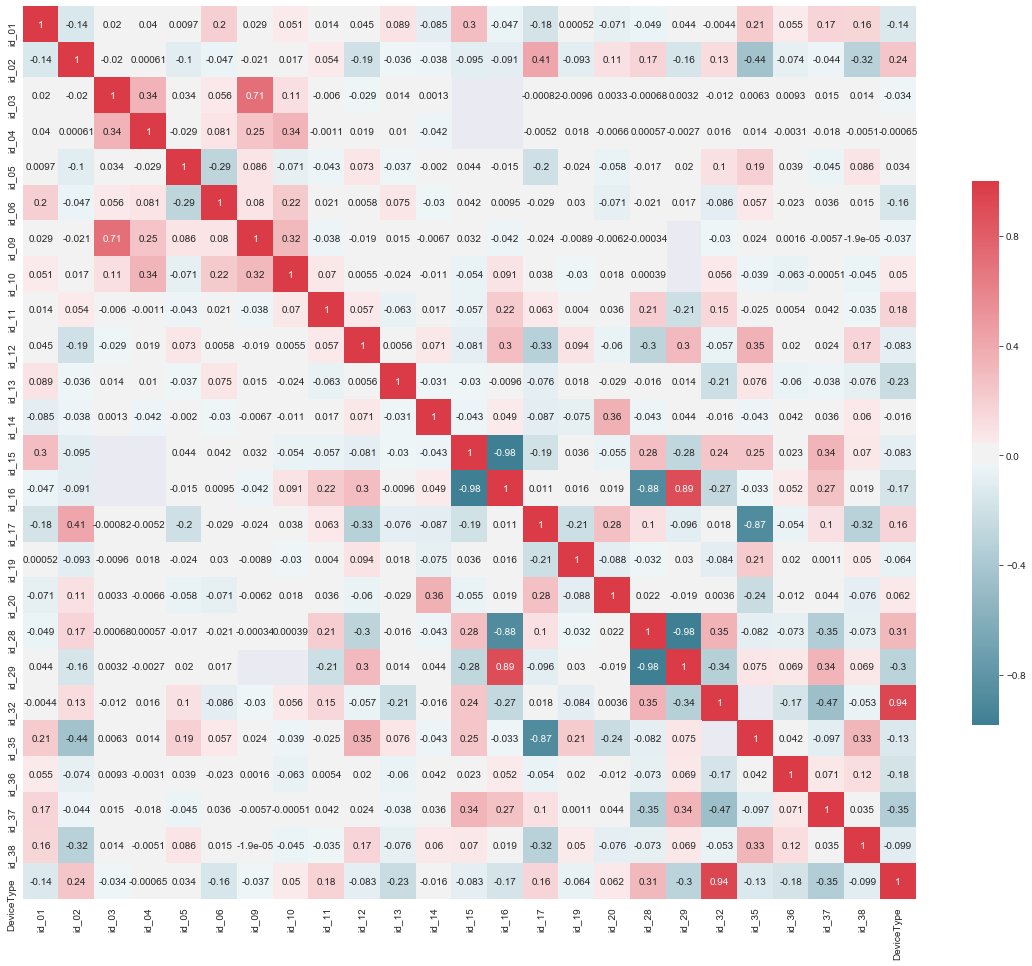

In [30]:
# Compute the correlation matrix
corr = X_.iloc[:, 1:31].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [31]:
# Consider dropping these highly correlated columns or ones with too many categories
# Considering tranforming
id_drop = ["id_16", "id_29"]
id_bad_cat = ["DeviceInfo", "id_33", "id_31"]

### V columns
There are columns that were engineered by veras. They warn that they maybe highly correlated to other columns. B/c these are engineering and not "base data", I am more willing to drop these columns if we find high correlations.

In [32]:
#https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id#NAN-search
nans_df = X.isna()
nans_groups={}
i_cols = ['V'+str(i) for i in range(1,340)]
for col in X.columns:
    cur_group = nans_df[col].sum()
    try:
        nans_groups[cur_group].append(col)
    except:
        nans_groups[cur_group]=[col]
del nans_df

In [33]:
nans_groups

{0: ['TransactionID',
  'TransactionDT',
  'TransactionAmt',
  'ProductCD',
  'card1',
  'C1',
  'C2',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14'],
 446307: ['id_01', 'id_12'],
 449668: ['id_02'],
 524216: ['id_03', 'id_04'],
 453675: ['id_05', 'id_06'],
 515614: ['id_09', 'id_10', 'D8', 'D9'],
 449562: ['id_11', 'id_28', 'id_29'],
 463220: ['id_13'],
 510496: ['id_14'],
 449555: ['id_15', 'id_35', 'id_36', 'id_37', 'id_38'],
 461200: ['id_16'],
 451171: ['id_17'],
 451222: ['id_19'],
 451279: ['id_20'],
 512975: ['id_30'],
 450258: ['id_31'],
 512954: ['id_32'],
 517251: ['id_33'],
 512735: ['id_34'],
 449730: ['DeviceType'],
 471874: ['DeviceInfo'],
 8933: ['card2'],
 1565: ['card3'],
 1577: ['card4'],
 4259: ['card5'],
 1571: ['card6'],
 65706: ['addr1', 'addr2'],
 352271: ['dist1'],
 94456: ['P_emaildomain'],
 453249: ['R_emaildomain'],
 1269: ['D1', 'V282', 'V283', 'V288', 'V289', 'V313', 'V314', 'V315'],
 280797: ['D2'],
 262878: [

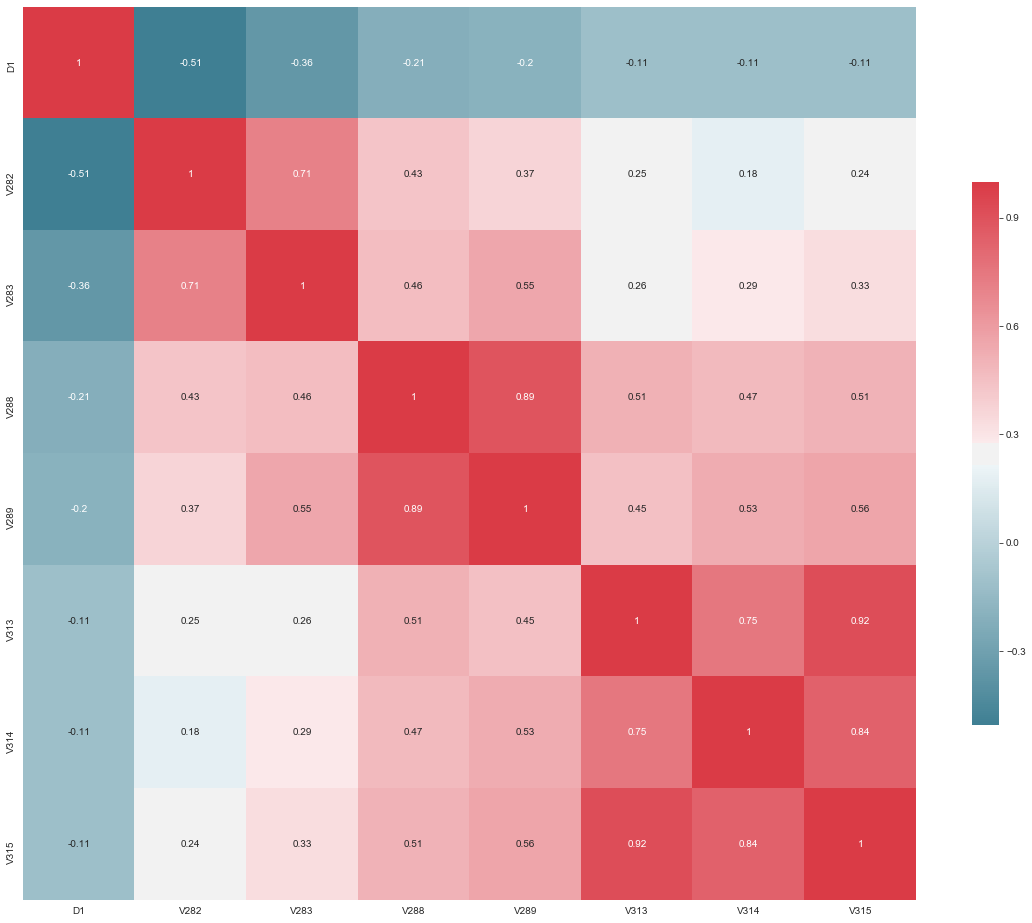

In [317]:
# Explore V groups with the exact same # of nan values
sus1 = ['D1', 'V282', 'V283', 'V288', 'V289', 'V313', 'V314', 'V315']
# Compute the correlation matrix
corr = X_.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [318]:
redun = [['V282', 'V283'], ['V288', 'V289'], ['V313', 'V314', 'V315']]
V_keep = []
V_drop = []

In [319]:
#https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id#NAN-search
#Use # of unique vals to pick between highly correlated variables    
def reduce_group(grps, V_keep):
    for g in grps:
        mx = 0; vx = g[0]
        for gg in g:
            n = X[str(gg)].nunique()
            if n>mx:
                mx = n
                vx = gg
        V_keep.append(vx)

reduce_group(redun, V_keep)

In [320]:
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

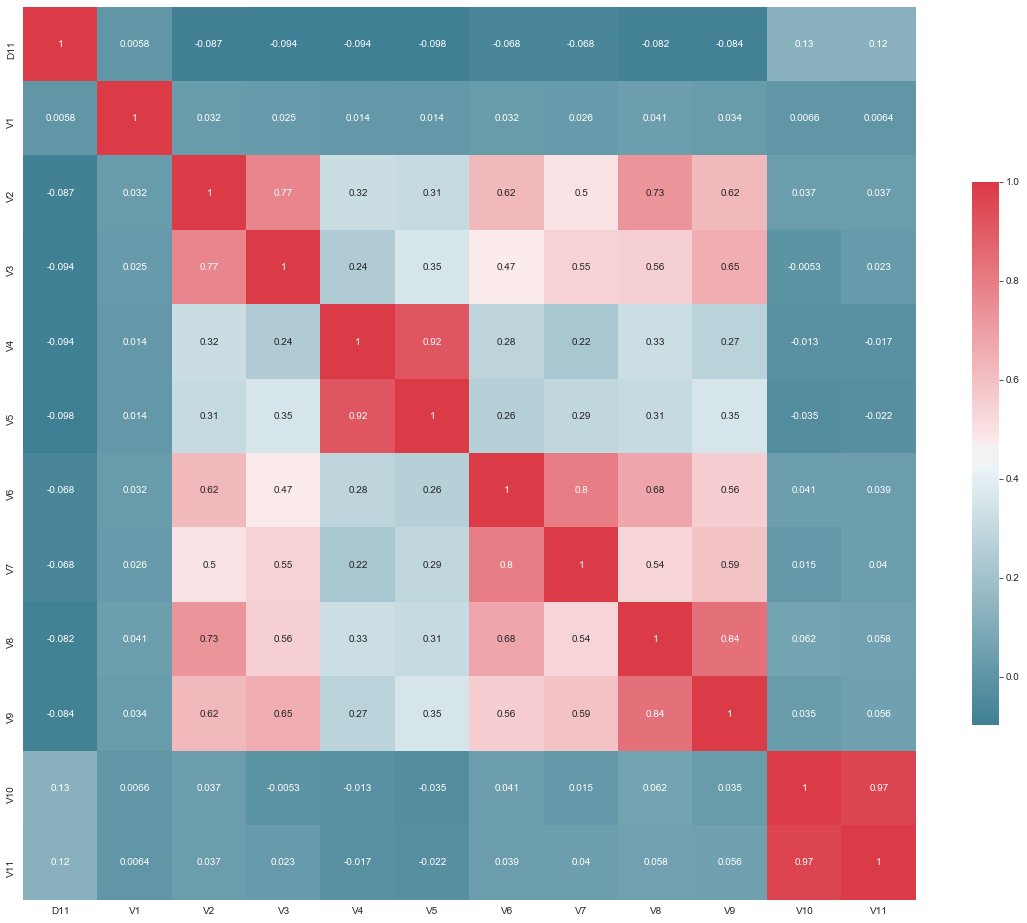

In [321]:
# Explore V groups with the exact same # of nan values
sus1 = ['D11',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11']
# Compute the correlation matrix
corr = X_.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [322]:
redun = [['V1'], ['V2', 'V3'], ['V4', 'V5'], ['V6', 'V7'], ['V8', 'V9'], ['V10', 'V11']]

In [323]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

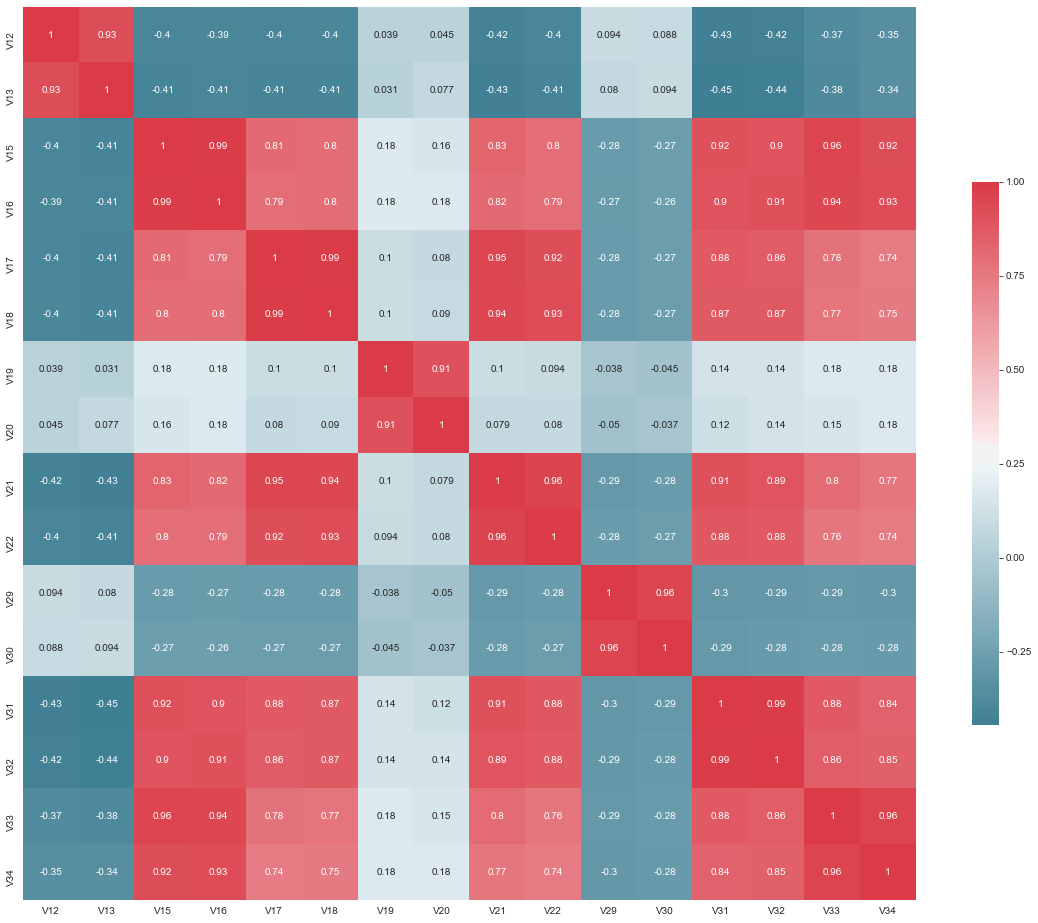

In [324]:
# Explore V groups with the exact same # of nan values
sus1 = ['V12',
  'V13',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V29',
  'V30',
  'V31',
  'V32',
  'V33',
  'V34']
# Compute the correlation matrix
corr = X_.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [325]:
redun = [['V12', 'V13'], ['V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V31', 'V32', 'V33', 'V34'], ['V19', 'V20'],
        ['V29', 'V30']]

In [326]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

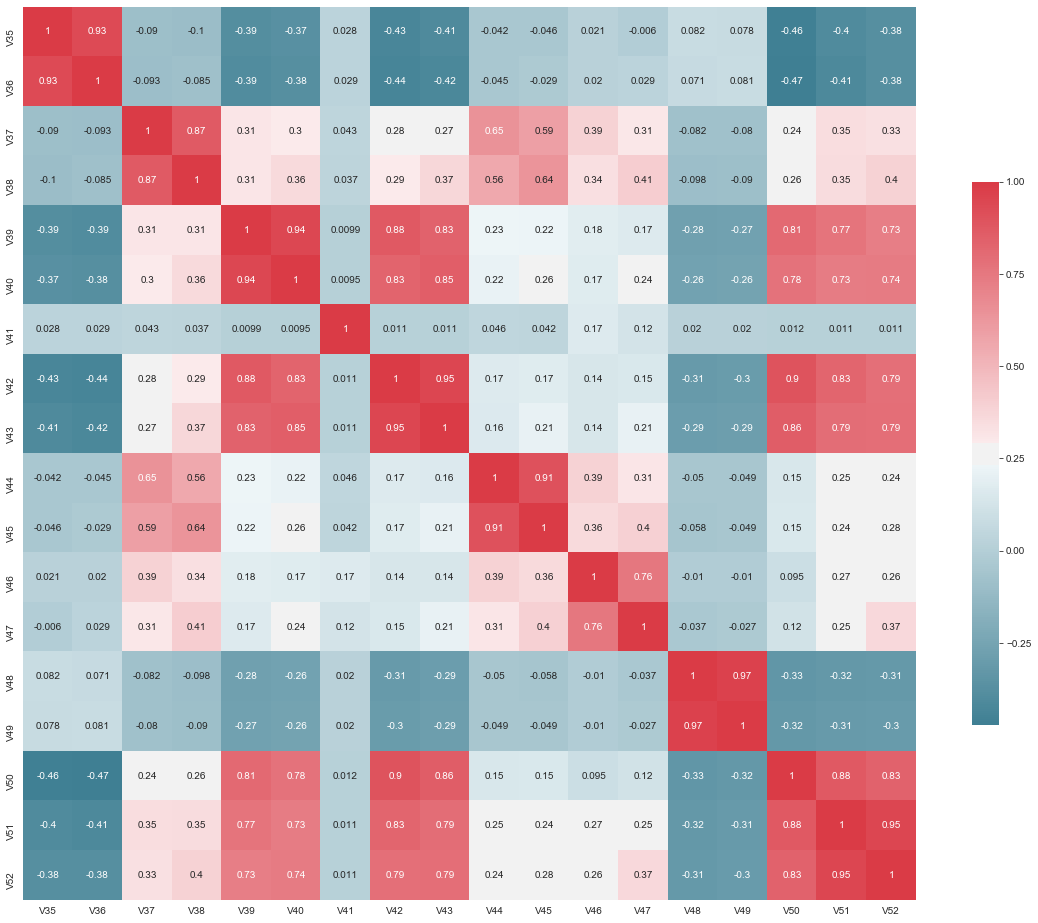

In [327]:
# Explore V groups with the exact same # of nan values
sus1 = ['V35',
  'V36',
  'V37',
  'V38',
  'V39',
  'V40',
  'V41',
  'V42',
  'V43',
  'V44',
  'V45',
  'V46',
  'V47',
  'V48',
  'V49',
  'V50',
  'V51',
  'V52']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [328]:
redun = [['V35', 'V36'], ['V37', 'V38', 'V42', 'V43', 'V50', 'V51', 'V52'], ['V41'], ['V44', 'V45'],
         ['V46', 'V47'], ['V48', 'V49'], ['V39', 'V40']]

In [329]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

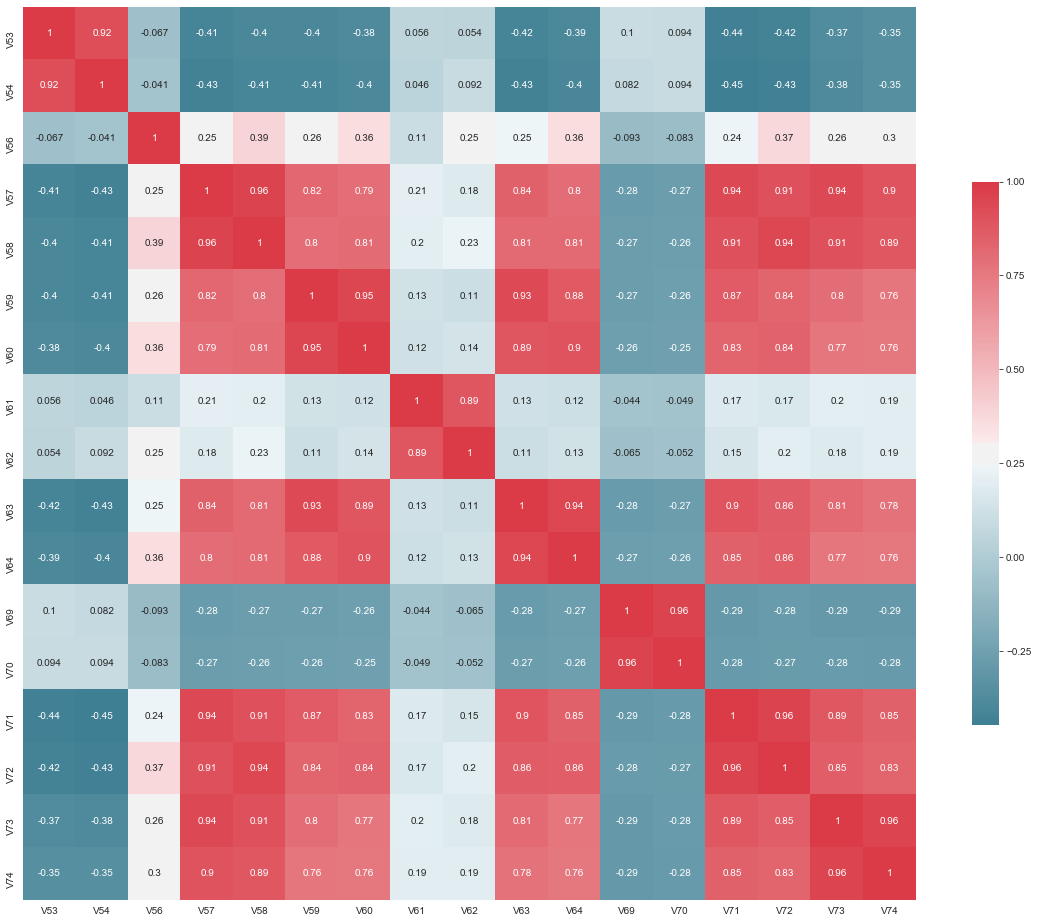

In [330]:
# Explore V groups with the exact same # of nan values
sus1 = ['V53',
  'V54',
  'V56',
  'V57',
  'V58',
  'V59',
  'V60',
  'V61',
  'V62',
  'V63',
  'V64',
  'V69',
  'V70',
  'V71',
  'V72',
  'V73',
  'V74']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [331]:
redun = [['V53', 'V54'], ['V56'], ['V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V71', 'V72', 'V73', 'V74'], 
         ['V61', 'V62'], ['V69', 'V70']]

In [332]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

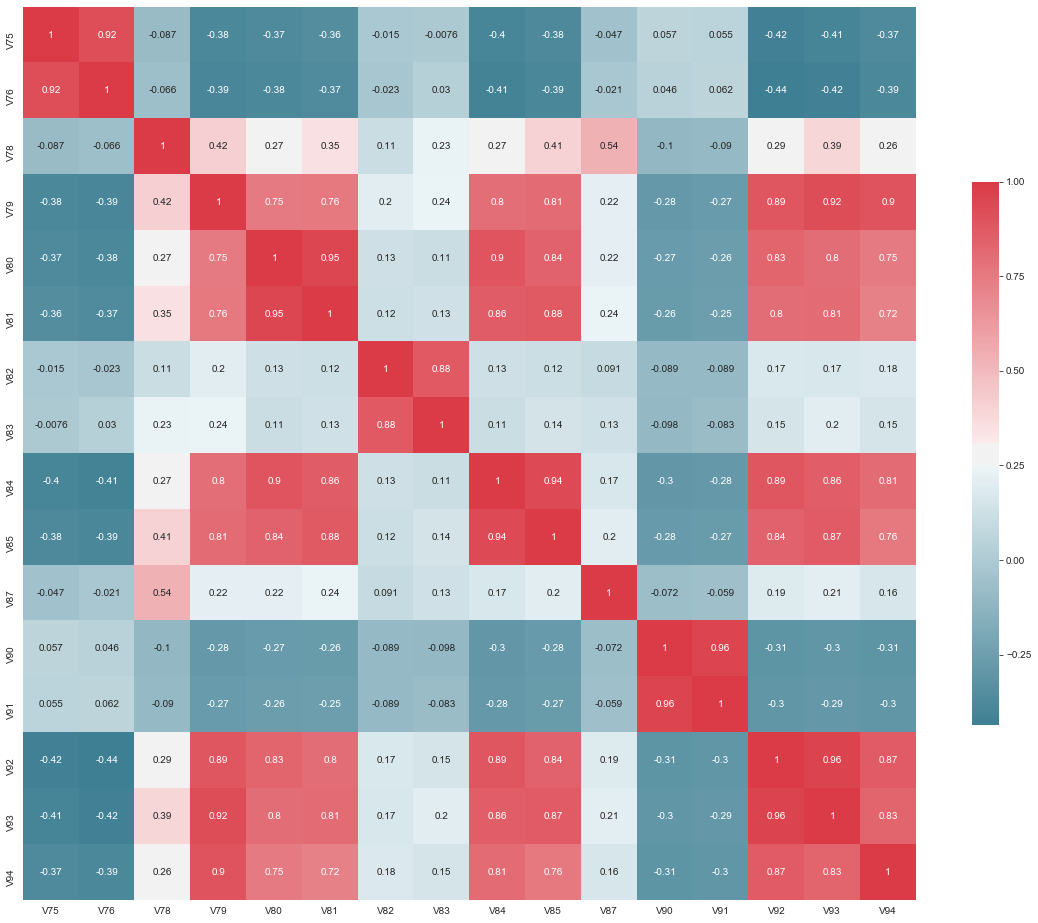

In [333]:
# Explore V groups with the exact same # of nan values
sus1 = ['V75',
  'V76',
  'V78',
  'V79',
  'V80',
  'V81',
  'V82',
  'V83',
  'V84',
  'V85',
  'V87',
  'V90',
  'V91',
  'V92',
  'V93',
  'V94']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [334]:
redun = [['V75', 'V76'], ['V78'], ['V79', 'V80', 'V81', 'V84', 'V85', 'V92', 'V93', 'V94'], 
         ['V82', 'V83'], ['V87'], ['V90', 'V91']]

In [335]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

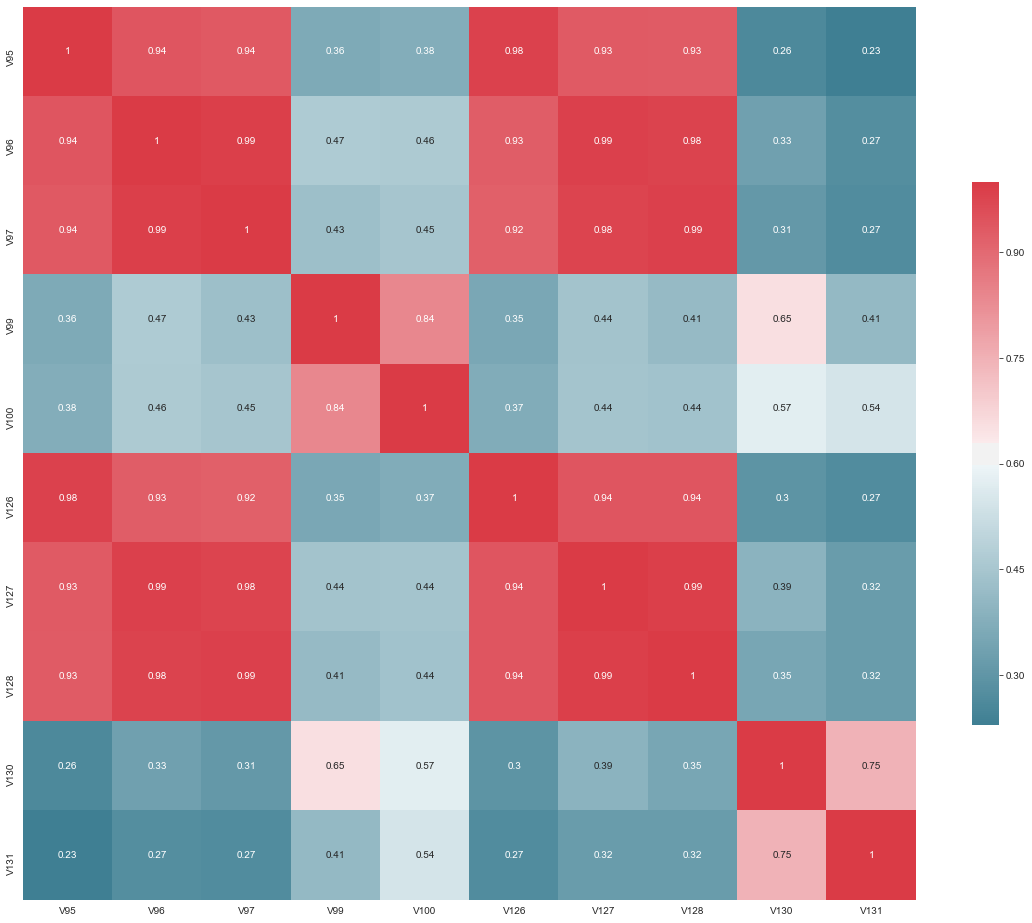

In [336]:
# Explore V groups with the exact same # of nan values
sus1 =['V95',
  'V96',
  'V97',
  'V99',
  'V100',
  'V126',
  'V127',
  'V128',
  'V130',
  'V131']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [337]:
redun = [['V95', 'V96', 'V97', 'V126', 'V127', 'V128'], ['V99', 'V100'], ['V130', 'V131']]

In [338]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

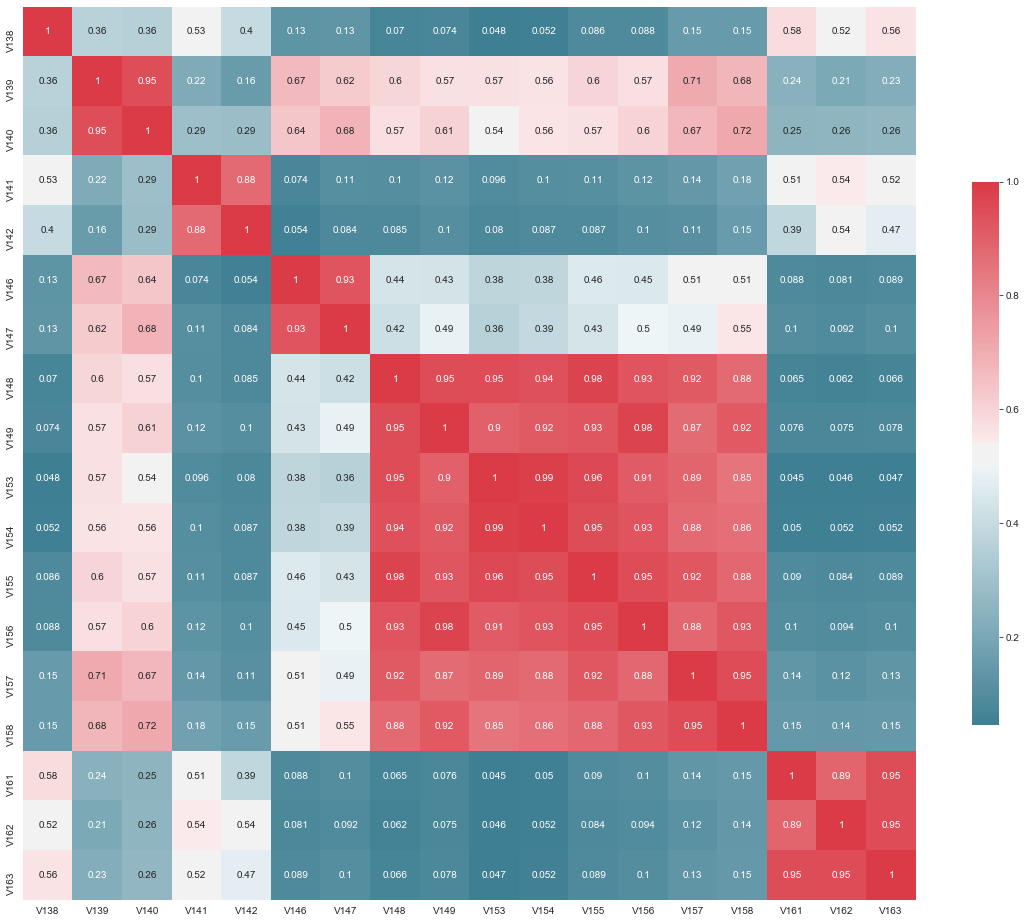

In [339]:
# Explore V groups with the exact same # of nan values
sus1 =['V138',
  'V139',
  'V140',
  'V141',
  'V142',
  'V146',
  'V147',
  'V148',
  'V149',
  'V153',
  'V154',
  'V155',
  'V156',
  'V157',
  'V158',
  'V161',
  'V162',
  'V163']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [340]:
redun = [['V138'],
  ['V139',
  'V140'],
  ['V141',
  'V142'],
  ['V146',
  'V147'],
  ['V148',
  'V149',
  'V153',
  'V154',
  'V155',
  'V156',
  'V157',
  'V158'],
  ['V161',
  'V162',
  'V163']]

In [341]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

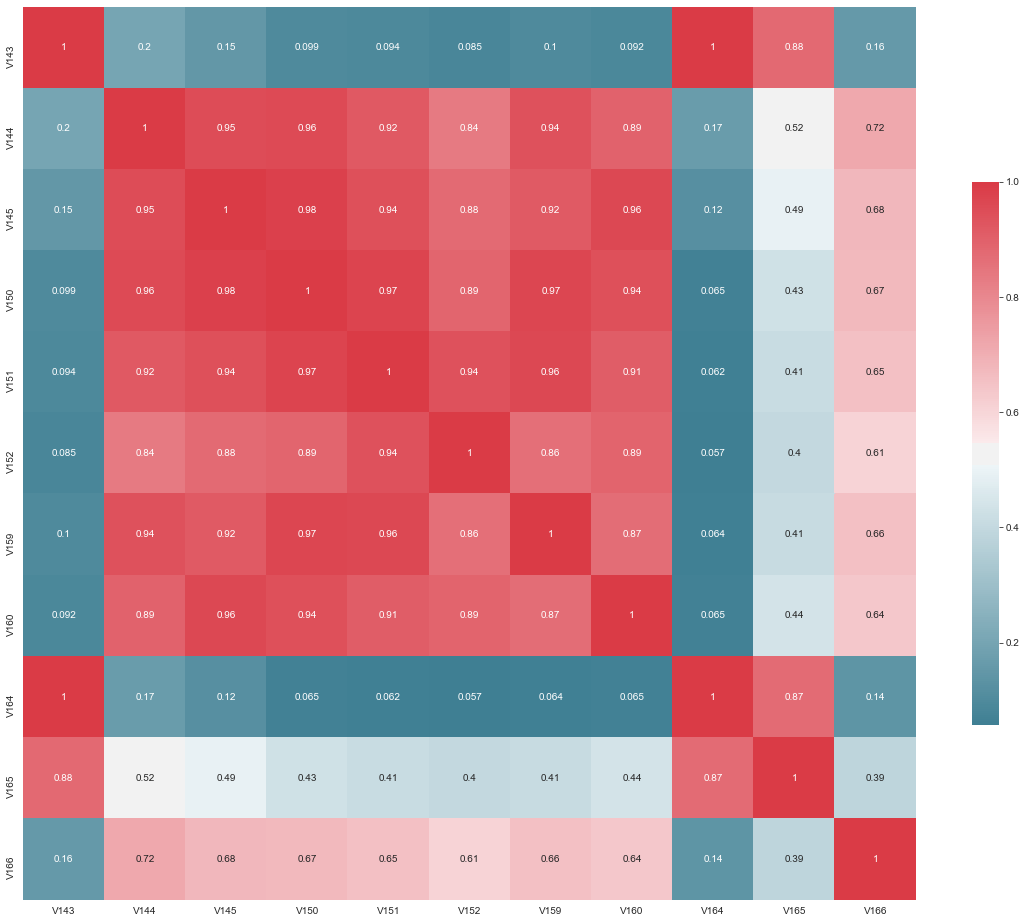

In [342]:
# Explore V groups with the exact same # of nan values
sus1 =['V143',
  'V144',
  'V145',
  'V150',
  'V151',
  'V152',
  'V159',
  'V160',
  'V164',
  'V165',
  'V166']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [343]:
redun = [['V143', 'V164', 'V165'],
  ['V144',
  'V145',
  'V150',
  'V151',
  'V152',
  'V159',
  'V160'],
  ['V166']]

In [344]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

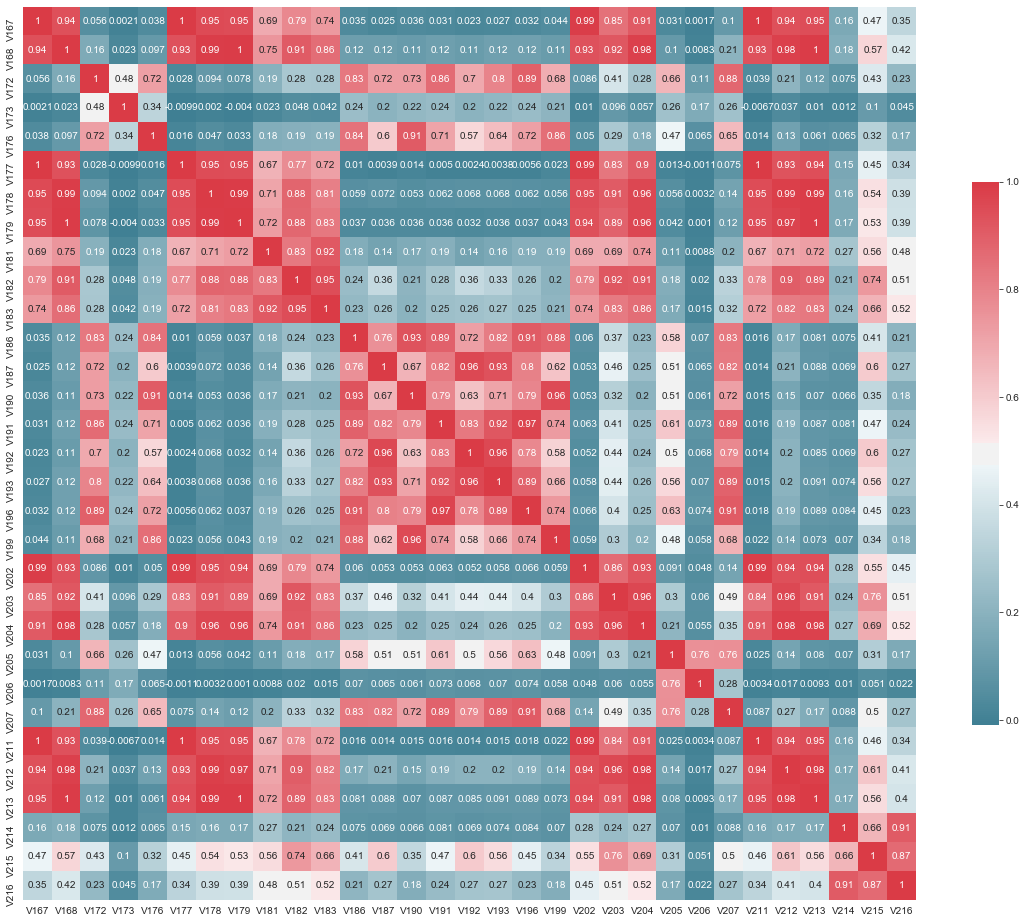

In [345]:
# Explore V groups with the exact same # of nan values
sus1 =['V167',
  'V168',
  'V172',
  'V173',
  'V176',
  'V177',
  'V178',
  'V179',
  'V181',
  'V182',
  'V183',
  'V186',
  'V187',
  'V190',
  'V191',
  'V192',
  'V193',
  'V196',
  'V199',
  'V202',
  'V203',
  'V204',
  'V205',
  'V206',
  'V207',
  'V211',
  'V212',
  'V213',
  'V214',
  'V215',
  'V216']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [346]:
redun = [['V167',
  'V168','V177',
  'V178',
  'V179','V181',
  'V182',
  'V183','V202',
  'V203',
  'V204','V211',
  'V212',
  'V213'],
  ['V172',
  'V173',
  'V176',
  'V186',
  'V187',
  'V190',
  'V191',
  'V192',
  'V193',
  'V196',
  'V199','V207'],
  ['V205'],
  ['V206'],
  ['V214',
  'V215',
  'V216']]

In [347]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

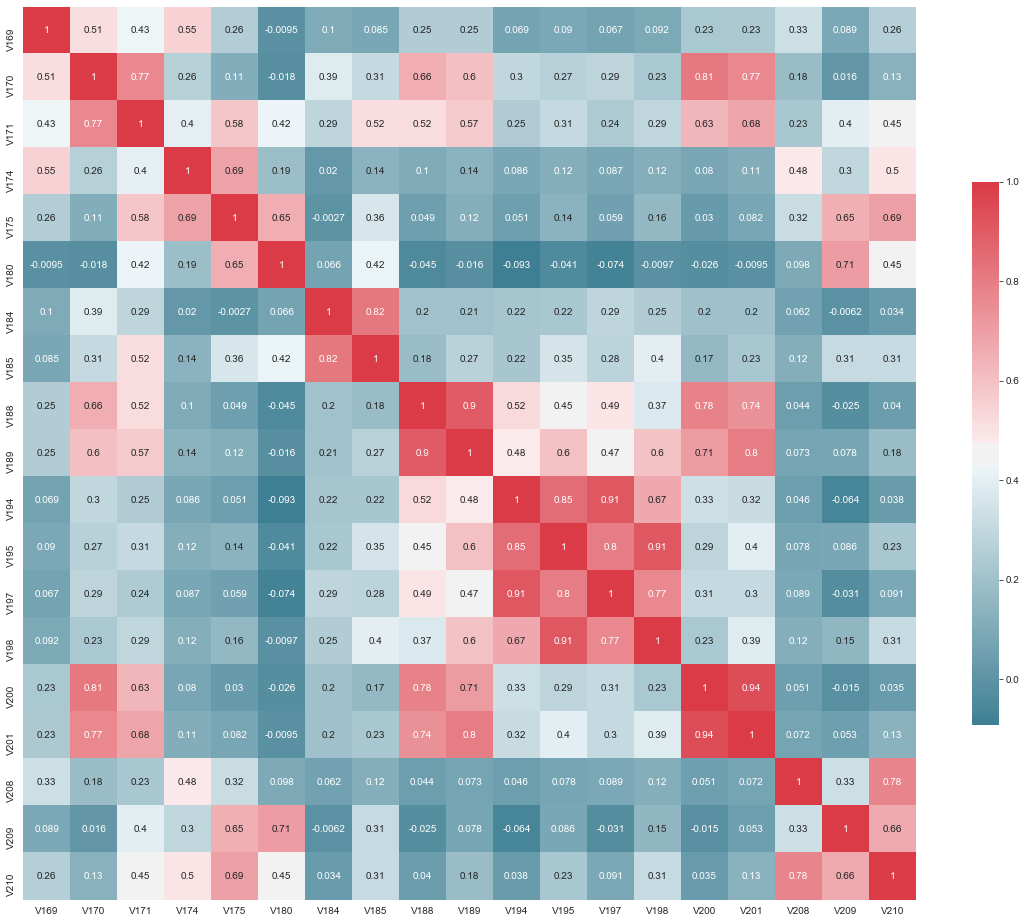

In [348]:
# Explore V groups with the exact same # of nan values
sus1 =['V169',
  'V170',
  'V171',
  'V174',
  'V175',
  'V180',
  'V184',
  'V185',
  'V188',
  'V189',
  'V194',
  'V195',
  'V197',
  'V198',
  'V200',
  'V201',
  'V208',
  'V209',
  'V210']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [349]:
redun = [['V169'],
  ['V170',
  'V171'],
  ['V174'],
  ['V175'],
  ['V180'],
  ['V184',
  'V185'],
  ['V188',
  'V189','V200',
  'V201'],
  ['V194',
  'V195',
  'V197',
  'V198'],
  ['V208', 'V210'],
  ['V209']]

In [350]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

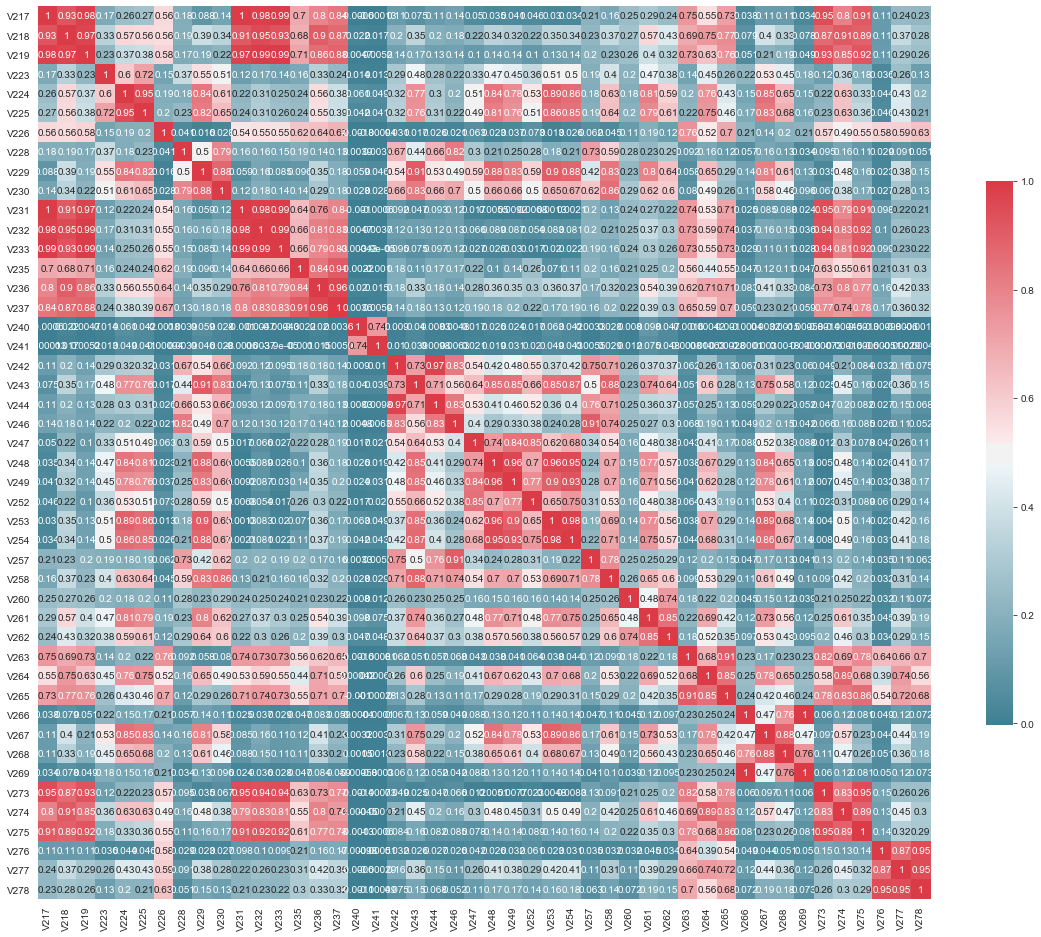

In [351]:
# Explore V groups with the exact same # of nan values
sus1 =['V217',
  'V218',
  'V219',
  'V223',
  'V224',
  'V225',
  'V226',
  'V228',
  'V229',
  'V230',
  'V231',
  'V232',
  'V233',
  'V235',
  'V236',
  'V237',
  'V240',
  'V241',
  'V242',
  'V243',
  'V244',
  'V246',
  'V247',
  'V248',
  'V249',
  'V252',
  'V253',
  'V254',
  'V257',
  'V258',
  'V260',
  'V261',
  'V262',
  'V263',
  'V264',
  'V265',
  'V266',
  'V267',
  'V268',
  'V269',
  'V273',
  'V274',
  'V275',
  'V276',
  'V277',
  'V278']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [352]:
redun = [['V217',
  'V218',
  'V219','V231',
  'V232',
  'V233','V236',
  'V237'],
  ['V223'],
  ['V224',
  'V225'],
  ["V226"],
  ['V228'],
  ['V229',
  'V230'],
  ['V235'],
  ['V240','V241'],['V242','V243','V244','V258'],
  ["V246",'V257'],['V247','V248','V249','V253','V254'],
  ['V252'],['V260'],['V261','V262'],
  ['V263','V265','V264'],['V266','V269'],
  ['V267','V268'],['V273','V274','V275'],
  ['V276','V277','V278']]

In [353]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

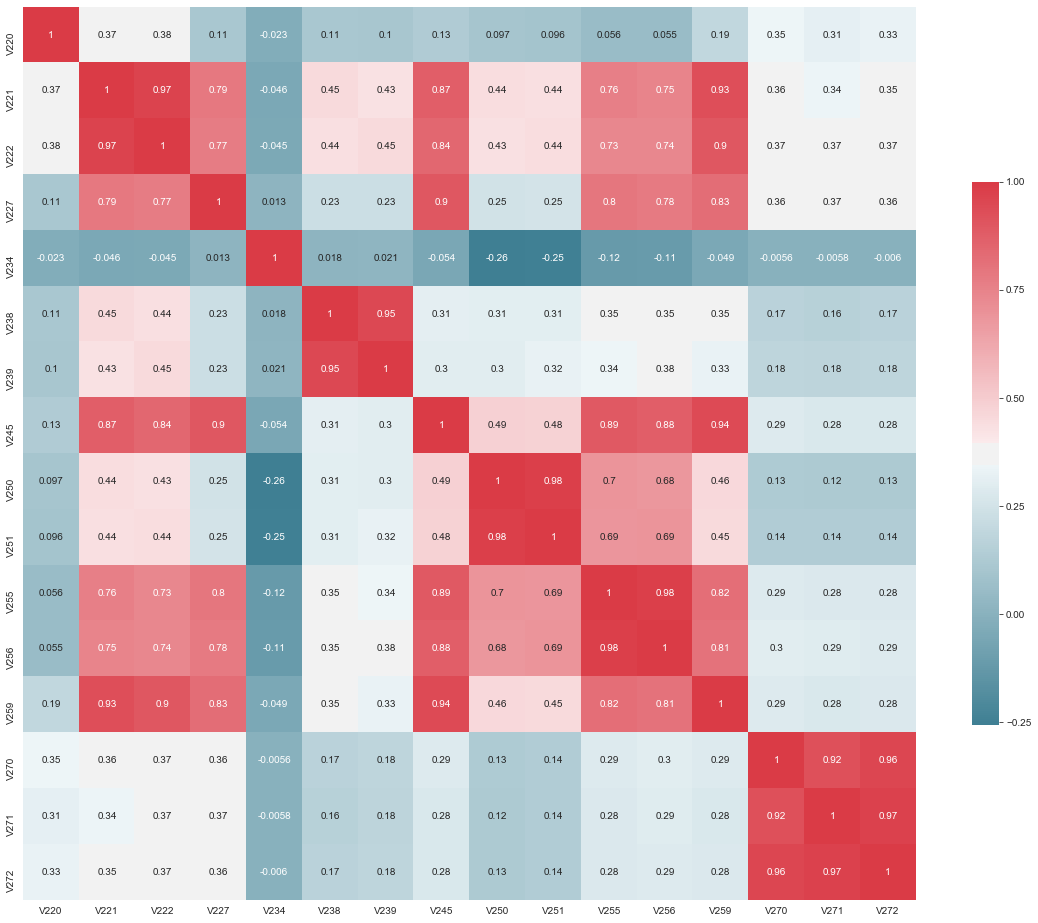

In [354]:
# Explore V groups with the exact same # of nan values
sus1 =['V220',
  'V221',
  'V222',
  'V227',
  'V234',
  'V238',
  'V239',
  'V245',
  'V250',
  'V251',
  'V255',
  'V256',
  'V259',
  'V270',
  'V271',
  'V272']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [355]:
redun = [['V220'],
  ['V221',
  'V222',
  'V227', 'V245', 'V255',
  'V256',
  'V259'],
  ['V234'],
  ['V238',
  'V239'],
  ['V250',
  'V251'],
  ['V270',
  'V271',
  'V272']]

In [356]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

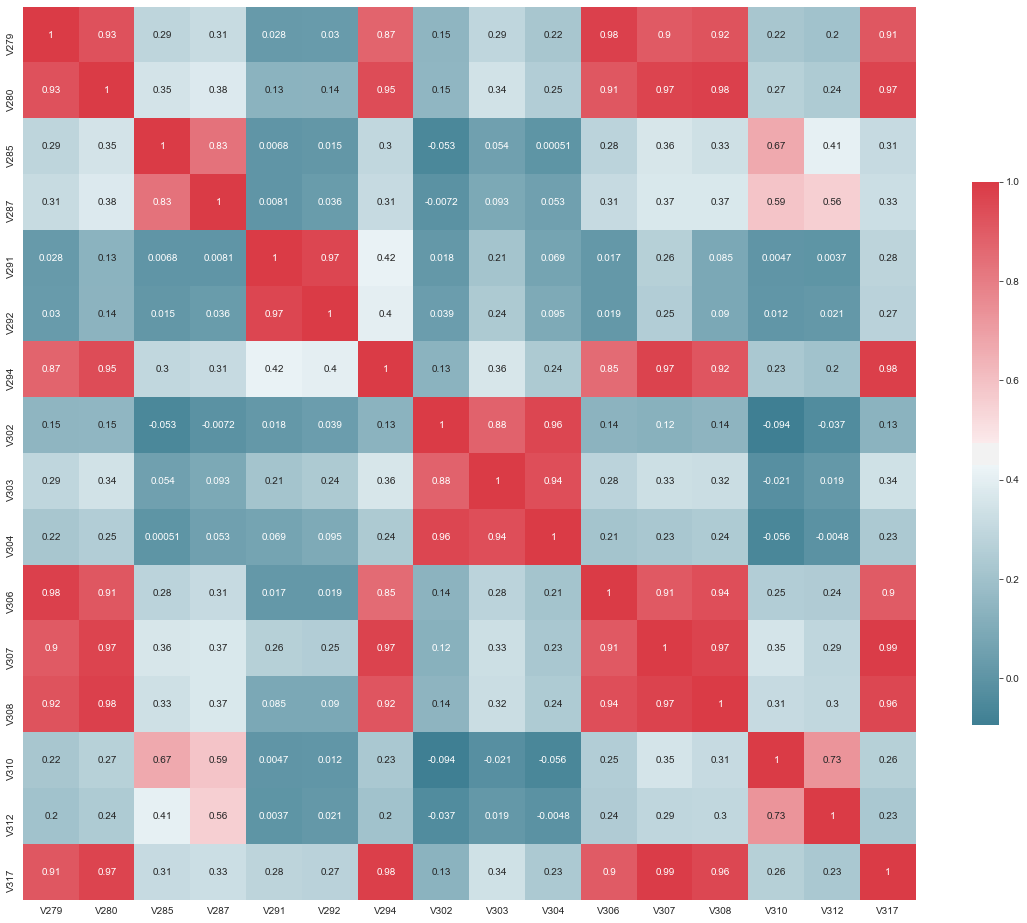

In [357]:
# Explore V groups with the exact same # of nan values
sus1 =['V279',
  'V280',
  'V285',
  'V287',
  'V291',
  'V292',
  'V294',
  'V302',
  'V303',
  'V304',
  'V306',
  'V307',
  'V308',
  'V310',
  'V312',
  'V317']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [358]:
redun = [['V279',
  'V280', 'V294',
  'V306',
  'V307',
  'V308', 'V317'],
  ['V285',
  'V287'],
  ['V291',
  'V292'],
  ['V302',
  'V303',
  'V304'],
  ['V310',
  'V312']]

In [359]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

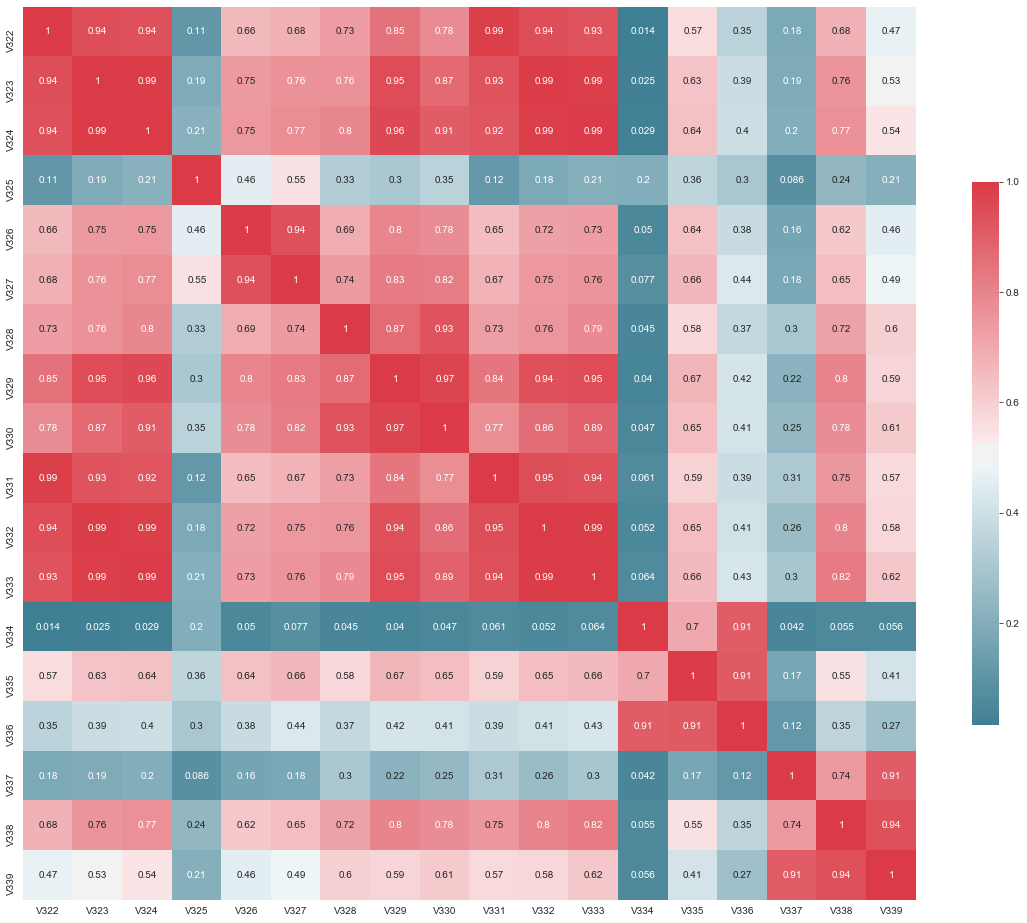

In [360]:
# Explore V groups with the exact same # of nan values
sus1 =['V322',
  'V323',
  'V324',
  'V325',
  'V326',
  'V327',
  'V328',
  'V329',
  'V330',
  'V331',
  'V332',
  'V333',
  'V334',
  'V335',
  'V336',
  'V337',
  'V338',
  'V339']
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [361]:
redun = [['V322',
  'V323',
  'V324', 'V329',
  'V330',
  'V331',
  'V332',
  'V333'],
  ['V325'],
  ['V326',
  'V327',
  'V328'],
  ['V334',
  'V335',
  'V336'],
  ['V337',
  'V338',
  'V339']]

In [362]:
reduce_group(redun, V_keep)
V_drop.extend(set([item for sublist in redun for item in sublist]) - set(V_keep))

In [371]:
#Tranform V columns (drop several correalted variables)
X = X.drop(columns=V_drop)
test_data = test_data.drop(columns=V_drop)

### C columns

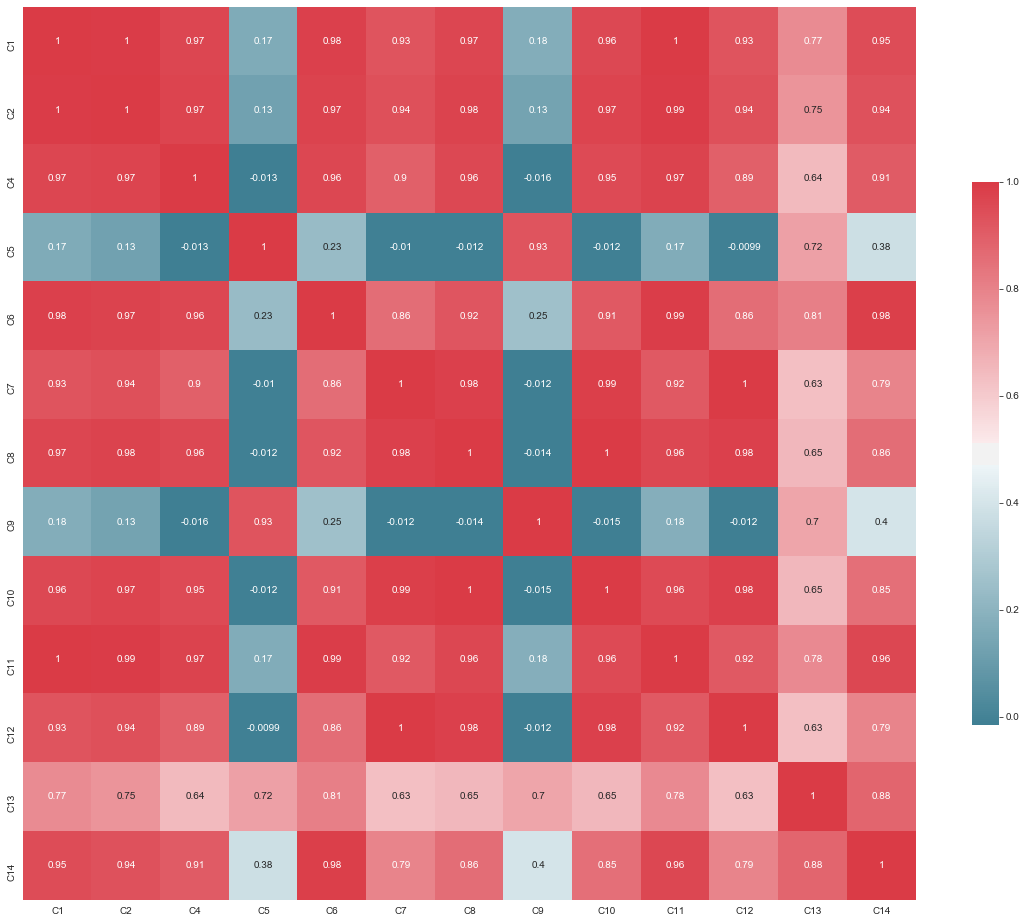

In [373]:
# Explore V groups with the exact same # of nan values
sus1 = X.columns[X.columns.str.contains('C')]
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [375]:
redun = [['C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10',
       'C11', 'C12', 'C14'], ['C5','C9'],  ['C13']]

In [376]:
C_keep = []
C_drop = []

In [377]:
#Consider transforming C variables that are highly correlated
reduce_group(redun, C_keep)
C_drop.extend(set([item for sublist in redun for item in sublist]) - set(C_keep))

C columns are also very very correlated but I'm hesitate to drop columns that are true data.

### M columns

In [393]:
ms = X.columns[X.columns.str.contains('M')]
mp = {'F':0,'T':1,'M0':2,'M1':3,'M2':4}
for m in ms: 
    X_[m] = X_[m].map(mp)

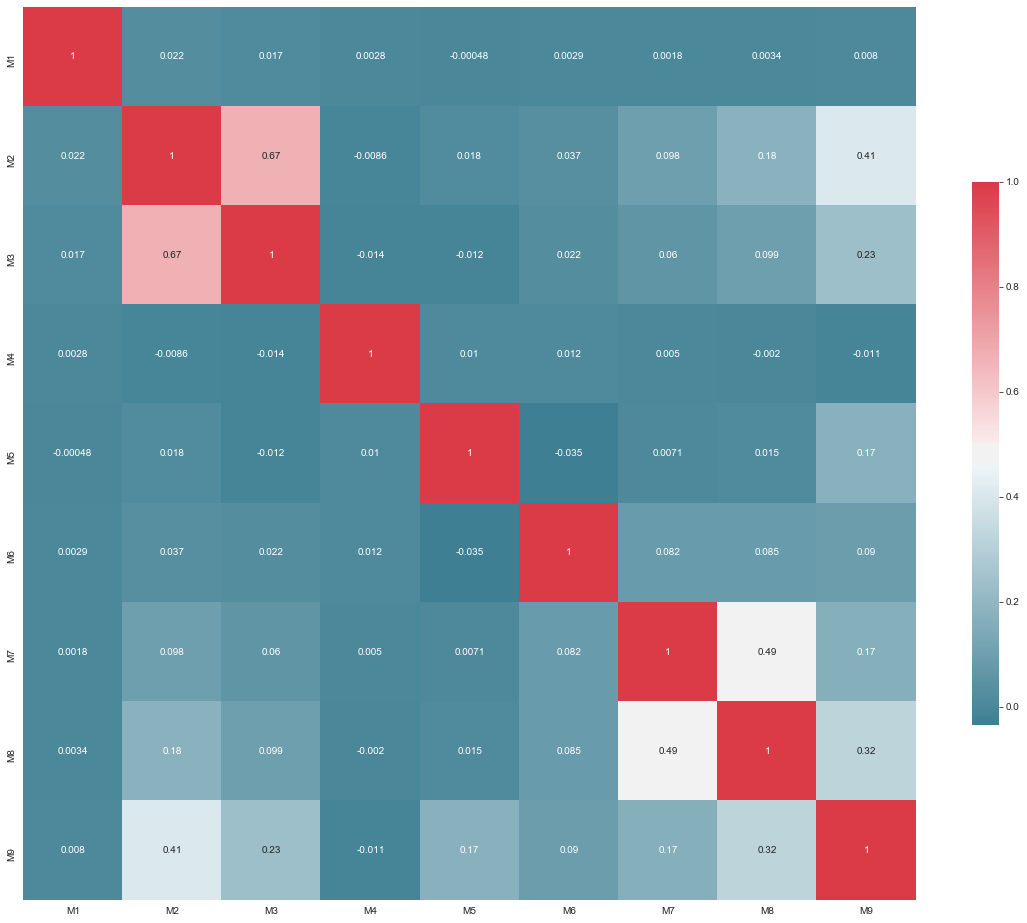

In [396]:
# Compute the correlation matrix
corr = X_.loc[:, ms].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

### D columns

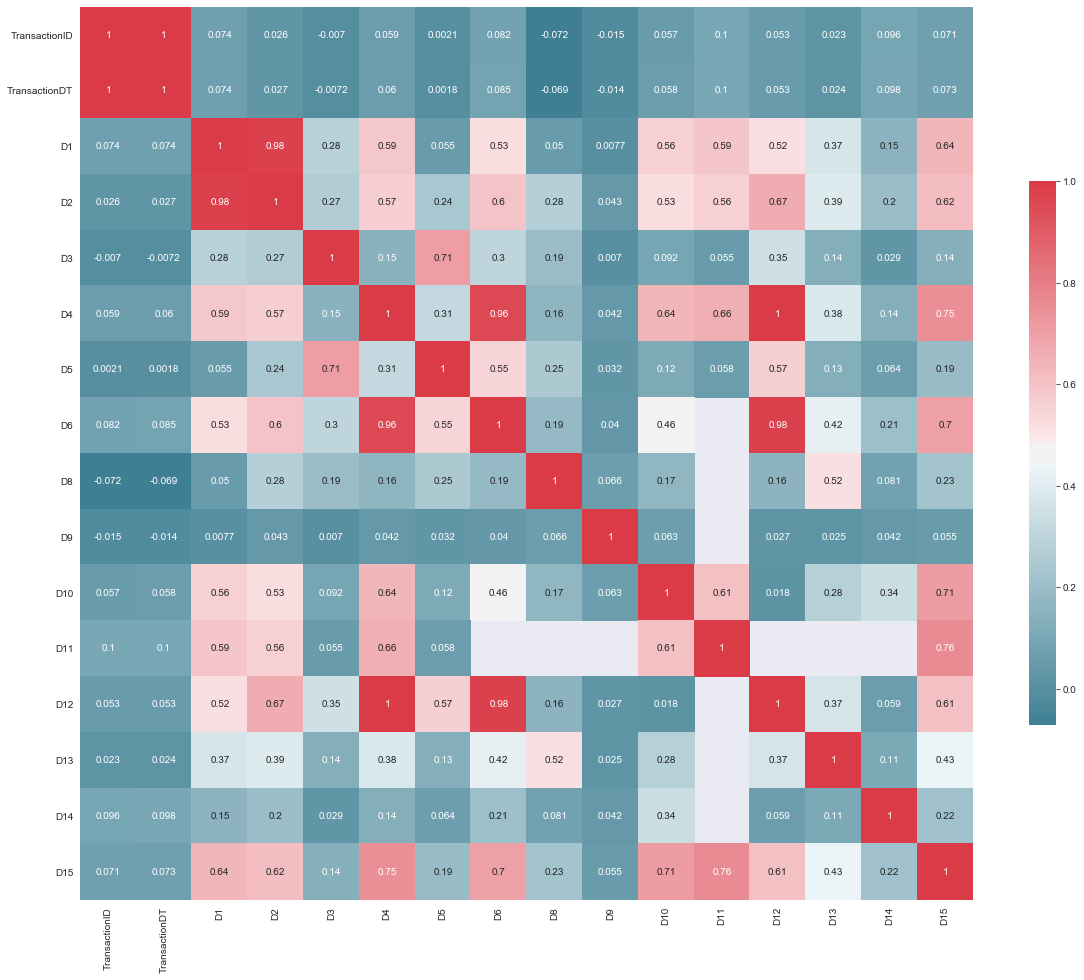

In [397]:
# Explore V groups with the exact same # of nan values
sus1 = X.columns[X.columns.str.contains('D')]
# Compute the correlation matrix
corr = X.loc[:, sus1].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [399]:
redun = [['D1', 'D2'], ['D3'], ['D4', 'D6', 'D12'], ['D5'],['D8'], ['D9'], ['D10'],
       ['D11'], ['D13'], ['D14'], ['D15']]

In [401]:
D_keep = []
D_drop = []

In [402]:
#Consider tranforming D variables that are highly correlated
reduce_group(redun, D_keep)
D_drop.extend(set([item for sublist in redun for item in sublist]) - set(D_keep))

### Detrending D columns

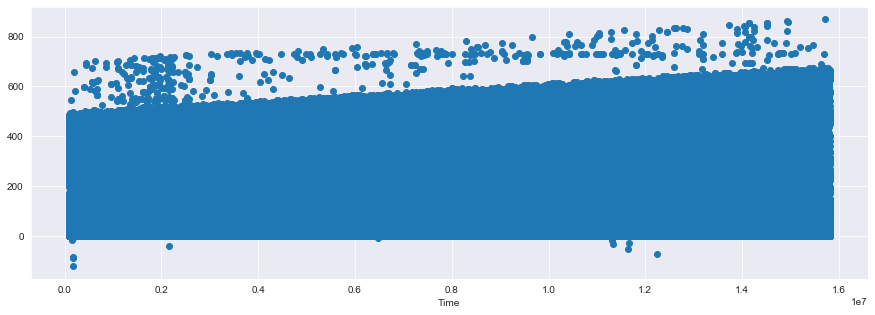

In [435]:
# Detrend D columns
plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.scatter(X_["TransactionDT"], X_['D4'])
plt.show()

In [430]:
# Normalize only some D
norm_D = ['D1', 'D4', 'D10', 'D11', 'D15']
for col in norm_D:
    X[col] = X[col] - X["TransactionDT"]/np.float32(24*60*60)
    test_data[col] = test_data[col] - test_data["TransactionDT"]/np.float32(24*60*60)

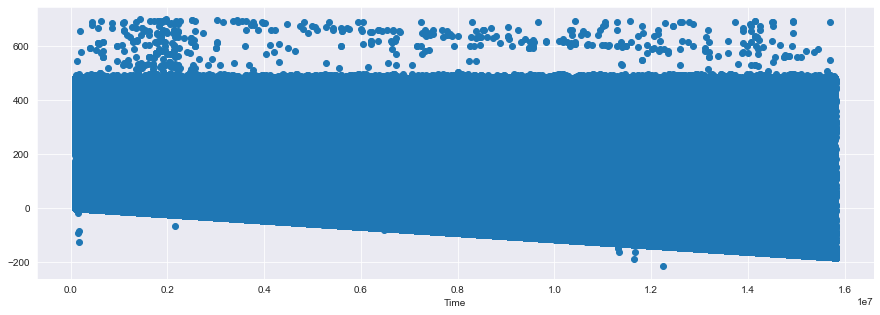

In [436]:
# Detrend D columns
plt.figure(figsize=(15,5))
plt.scatter(X["TransactionDT"], X['D4'])
plt.xlabel('Time')
plt.show()

Chris Deotte found other columns to be unecesary. We will experiment with dropping these columns or not and see what preforms best.

In [507]:
chris_drop = ['D6','D8','D9','D12','D13','D14', 
              'M5','id_33', 'card4',
              'id_14','id_30','id_32','id_34']

## Feature Engineering
Several notebooks create aggregate features based on each customer (proxy: credit card i). The idea is that a fraudster may have some nonfraud and some fraud transactions. Creating aggregate features helps identify "fraud" transactions based on aggreagte features that capture the "history" of transactions for a customer. More information included https://www.kaggle.com/cdeotte/xgb-fraud-with-magic-0-9600#How-the-Magic-Works

In [442]:
# Credit: https://www.kaggle.com/cdeotte/xgb-fraud-with-magic-0-9600/notebook#Normalize-D-Columns
# FREQUENCY ENCODE TOGETHER
def encode_FE(df1, df2, cols):
    for col in cols:
        df = pd.concat([df1[col],df2[col]])
        vc = df.value_counts(dropna=True, normalize=True).to_dict()
        vc[-1] = -1
        nm = col+'_FE'
        df1[nm] = df1[col].map(vc)
        df1[nm] = df1[nm].astype('float32')
        df2[nm] = df2[col].map(vc)
        df2[nm] = df2[nm].astype('float32')
        print(nm,', ',end='')
        
# LABEL ENCODE
def encode_LE(col,train,test,verbose=True):
    df_comb = pd.concat([train[col],test[col]],axis=0)
    df_comb,_ = df_comb.factorize(sort=True)
    nm = col
    if df_comb.max()>32000: 
        train[nm] = df_comb[:len(train)].astype('int32')
        test[nm] = df_comb[len(train):].astype('int32')
    else:
        train[nm] = df_comb[:len(train)].astype('int16')
        test[nm] = df_comb[len(train):].astype('int16')
    del df_comb;
    if verbose: print(nm,', ',end='')
        
# GROUP AGGREGATION MEAN AND STD
# https://www.kaggle.com/kyakovlev/ieee-fe-with-some-eda
def encode_AG(main_columns, uids, aggregations, train_df, test_df, 
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:  
        for col in uids:
            for agg_type in aggregations:
                new_col_name = main_column+'_'+col+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()   

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')
                
# COMBINE FEATURES
def encode_CB(col1,col2,df1,df2):
    nm = col1+'_'+col2
    df1[nm] = df1[col1].astype(str)+'_'+df1[col2].astype(str)
    df2[nm] = df2[col1].astype(str)+'_'+df2[col2].astype(str) 
    encode_LE(nm,df1, df2, verbose=False)
    print(nm,', ',end='')

In [444]:
# Adding features found in chris's notebook
# Credit: https://www.kaggle.com/cdeotte/xgb-fraud-with-magic-0-9600/notebook#Normalize-D-Column
# TRANSACTION AMT CENTS
X['cents'] = (X['TransactionAmt'] - np.floor(X['TransactionAmt'])).astype('float32')
test_data['cents'] = (test_data['TransactionAmt'] - np.floor(test_data['TransactionAmt'])).astype('float32')
print('cents, ', end='')
# FREQUENCY ENCODE: ADDR1, CARD1, CARD2, CARD3, P_EMAILDOMAIN
encode_FE(X,test_data,['addr1','card1','card2','card3','P_emaildomain'])
# COMBINE COLUMNS CARD1+ADDR1, CARD1+ADDR1+P_EMAILDOMAIN
encode_CB('card1','addr1', X, test_data)
encode_CB('card1_addr1','P_emaildomain', X, test_data)
# FREQUENCY ENOCDE
encode_FE(X,test_data,['card1_addr1','card1_addr1_P_emaildomain'])
# GROUP AGGREGATE
encode_AG(['TransactionAmt','D9','D11'],
          ['card1','card1_addr1','card1_addr1_P_emaildomain'],
          ['mean','std'], 
          X, test_data,
          usena=True)

cents, addr1_FE , card1_FE , card2_FE , card3_FE , P_emaildomain_FE , card1_addr1 , card1_addr1_P_emaildomain , card1_addr1_FE , card1_addr1_P_emaildomain_FE , 'TransactionAmt_card1_mean' , 'TransactionAmt_card1_std' , 'TransactionAmt_card1_addr1_mean' , 'TransactionAmt_card1_addr1_std' , 'TransactionAmt_card1_addr1_P_emaildomain_mean' , 'TransactionAmt_card1_addr1_P_emaildomain_std' , 'D9_card1_mean' , 'D9_card1_std' , 'D9_card1_addr1_mean' , 'D9_card1_addr1_std' , 'D9_card1_addr1_P_emaildomain_mean' , 'D9_card1_addr1_P_emaildomain_std' , 'D11_card1_mean' , 'D11_card1_std' , 'D11_card1_addr1_mean' , 'D11_card1_addr1_std' , 'D11_card1_addr1_P_emaildomain_mean' , 'D11_card1_addr1_P_emaildomain_std' , 

## Dummy Encode

In [476]:
# Drop unnecesary columns
X.drop(columns=['TransactionID', 'TransactionDT'], inplace=True)
test_data.drop(columns=['TransactionID', 'TransactionDT'], inplace=True)

LGBM doesn't require dummy encoding let's save those df now.

In [ ]:
# Save full data for LGBM model (NAs present)
X.to_pickle("cleandata/LGBM_train_X_1.pkl")
y.to_pickle("cleandata/train_y.pkl")
test_data.to_pickle("cleandata/LGBM_test_X_1.pkl")

In [508]:
# Drop optional columns
optional_drop = []
optional_drop.extend(id_drop)
optional_drop.extend(id_bad_cat)
optional_drop.extend(C_drop)
optional_drop.extend(D_drop)
optional_drop.extend(chris_drop)
optional_drop = list(set(optional_drop))

# Save smaller data for LGBM model (NAs filled)
X_2 = X.drop(columns=optional_drop)
test_data_2 = test_data.drop(columns=optional_drop)

X_2.to_pickle("cleandata/LGBM_train_X_2.pkl")
test_data_2.to_pickle("cleandata/LGBM_test_X_2.pkl")

In [513]:
# Fill NAs and save full and small verison of those df for LGBM model
X_full = X.fillna(-999)
test_data_full = test_data.fillna(-999)

# Save full data for LGBM model (NAs filled)
X_full.to_pickle("cleandata/LGBM_train_X_3.pkl")
test_data_full.to_pickle("cleandata/LGBM_test_X_3.pkl")

In [517]:
X_2_full = X_2.fillna(-999)
test_data_2_full = test_data_2.fillna(-999)

# Save small data for LGBM model (NAs filled)
X_2_full.to_pickle("cleandata/LGBM_train_X_4.pkl")
test_data_2_full.to_pickle("cleandata/LGBM_test_X_4.pkl")

The rest of the models require dummy encoding. Let's dummy encode.

In [548]:
cat_levels = {}
for col in X.columns:
    if not is_numeric_dtype(X[col]):
        cat_levels[col] = X[col].nunique()

In [566]:
cat_levels

{'id_12': 2,
 'id_15': 3,
 'id_16': 2,
 'id_28': 2,
 'id_29': 2,
 'id_30': 75,
 'id_31': 37,
 'id_33': 260,
 'id_34': 4,
 'id_35': 2,
 'id_36': 2,
 'id_37': 2,
 'id_38': 2,
 'DeviceType': 2,
 'DeviceInfo': 633,
 'ProductCD': 5,
 'card4': 4,
 'card6': 4,
 'P_emaildomain': 59,
 'R_emaildomain': 60,
 'M1': 2,
 'M2': 2,
 'M3': 2,
 'M4': 3,
 'M5': 2,
 'M6': 2,
 'M7': 2,
 'M8': 2,
 'M9': 2}

In [594]:
cats = list(cat_levels.keys())
dum_X = pd.DataFrame()
dum_test = pd.DataFrame()

for col in cats:
    #print(col)
    #X = X.join(pd.get_dummies(X[col], prefix=col, drop_first=True))
    dum_X = pd.concat((dum_X, pd.get_dummies(X[col], prefix=col, drop_first=True)), axis=1)
    X.drop(columns=col, inplace=True)
    dum_test = pd.concat((dum_test, pd.get_dummies(test_data[col], prefix=col, drop_first=True)), axis=1)
    #test_data = test_data.join(test_data[col], prefix=col, drop_first=True)
    test_data.drop(columns=col, inplace=True)

In [614]:
X = pd.concat((X, dum_X), axis=1)
test_data = pd.concat((test_data, dum_test), axis=1)

In [627]:
# Save full data for LR, XGBoost model (NAs present)
X.to_pickle("cleandata/XGBoost_train_X_1.pkl")
test_data.to_pickle("cleandata/XGBoost_test_X_1.pkl")

In [628]:
# Remove cat columns from optional drop
optional_drop = list(set(optional_drop).difference(cats))

# Save smaller data for LGBM model (NAs present)
X_2 = X.drop(columns=optional_drop)
test_data_2 = test_data.drop(columns=optional_drop)

X_2.to_pickle("cleandata/XGBoost_train_X_2.pkl")
test_data_2.to_pickle("cleandata/XGBoost_test_X_2.pkl")

In [629]:
# Fill NAs and save full and small verison of those df for LGBM model
X_full = X.fillna(-999)
test_data_full = test_data.fillna(-999)

# Save full data for LGBM model (NAs filled)
X_full.to_pickle("cleandata/XGBoost_LR_train_X_1.pkl")
test_data_full.to_pickle("cleandata/XGBoost_LR_test_X_1.pkl")

In [632]:
X_2_full = X_2.fillna(-999)
test_data_2_full = test_data_2.fillna(-999)

# Save small data for LGBM model (NAs filled)
X_2_full.to_pickle("cleandata/XGBoost_LR_train_X_2.pkl")
test_data_2_full.to_pickle("cleandata/XGBoost_LR_test_X_2.pkl")

Here is a summary of what files are provided in the cleandata/ folder and what preprocessing was applied.

1) Preprocessing applied to all files:
- Features with > 90% data missing or > 90% data with the same value were dropped
- If possible, categorical variables with 100s of categories were mapped to coaser categoricals
- Correlation plot analysis done on "V" columns and columns were dropped reduce collinearlity
	- https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id
- Some "D" columns were normalized for time
- Aggregate features were added using "magic" technique 
	- https://www.kaggle.com/cdeotte/xgb-fraud-with-magic-0-9600#How-the-Magic-Works
- Dropped TransactionID and TransactionDT


2) Specific preprocessing applied based on classifiers:
#### y_train.pkl
	- contains binary fraud/notfraud response for training dataset

#### cleanLGBM.zip 
	LGBM_{train, test}_X_1.pkl
		- Full 200 features from output of 1) above
		- No dummy creation
	LGBM_{train, test}_X_2.pkl
		- Removed additional features
			- Highly correlated "C", "D" features
			- Removed features Chris (1st place winners) removed
			- Removed caterogical features withh 200+ categories even after 1)
		- No dummy creation
	LGBM_{train, test}_X_3.pkl
		- Exact same as LGBM_{train, test}_X_1.pkl except NAs filled with -999
	LGBM_{train, test}_X_4.pkl
		- Exact same as LGBM_{train, test}_X_2.pkl except NAs filled with -999

#### cleanXGonly.zip 
	XGBoost_{train, test}_X_1.pkl
		- Full 200 features
		- Dummies created
	XGBoost_{train, test}_X_2.pkl
		- Removed additional features
			- Highly correlated "C", "D" features
			- Removed features Chris (1st place winners) removed
			- Removed caterogical features withh 200+ categories even after 1)
		- Dummies created

#### cleanXG_LR.zip	
	XGBoost_LR_{train, test}_X_1.pkl
		- Exact same as XGBoost_{train, test}_X_1.pkl except NAs filled with -999
	XGBoost_LR_{train, test}_X_2.pkl
		- Exact same as XGBoost_{train, test}_X_2.pkl except NAs filled with -999


